<a href="https://colab.research.google.com/github/elianedp/ExpertSystem/blob/main/Projeto_ERON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório Final - ATP de Preparação e Análise Exploratória de Dados
# Curso de Tecnologia em Big Data e Inteligência Analítica
# Pontifícia Universidade Católica do Paraná (PUCPR)

# Aluna: Eliane Maria de Pieri
meury_smi@hotmail.com


# Introdução

Nesta atividade, vamos trabalhar com um conjunto de dados da empresa Enron. A Enron foi uma das maiores empresas de energia dos Estados Unidos. No seu auge, chegou a valer 65 bilhões de dólares e ela faliu em 24 dias.  A Enron foi fundada em 1985 por Kenneth Lay com a fusão da Houston Natural Gas e da InterNorth. Anos depois, quando Jeffrey Skilling tomou posse, ele estabeleceu um conjunto de diretores que criaram entidades fictícias, relatórios financeiros fracos e contabilidades erradas, que somadas, esconderam bilhões de dólares e projetos fracassados dos investidores. O esquema foi tão complexo que nem mesmo auditorias profissionais foram capazes de identificar estes problemas, e a empresa foi investigada pelo governo norte-americano, incluindo a sua suprema corte.
A base de dados utilizada na investigação incluía  aproximadamente 500 mil e-mails trocados por empregados da Enron.  Estes e-mails foram obtidos pela comissão regulatória de energia dos Estados Unidos durante sua investigação. A base de dados que vamos utilizar sumariza informações não apenas destes e-mails, mas também de salário e ações da bolsa de valores dos envolvidos. Além disso, os funcionários são divididos em pessoas de interesse (Person of Interest, ou POI), que participaram da fraude; e funcionários que não participaram da fraude, ou não-POIs.


# Importando as bibliotecas

Na célula abaixo, as principais bibliotecas para análise de dados são importadas. Sinta-se a vontade para importar mais bibliotecas de acordo com sua demanda e/ou preferência, contudo, garanta que todos os comandos de `import` sejam feitos na célula abaixo.

In [213]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Carregamento de dados

Na célula abaixo é realizado o carregamento da base de dados.
Você **não** deve alterar o código apresentado.

Verificando se os dados carregaram corretamente:

In [214]:
# Base Enron
from google.colab import files
uploaded = files.upload()

Saving enron.csv to enron (3).csv


In [269]:
df = pd.read_csv('enron.csv')
df.head()

bonus  deferral_payments  deferred_income  director_fees  \
0  4175000.0          2869717.0       -3081055.0            NaN   
1        NaN           178980.0              NaN            NaN   
2        NaN                NaN          -5104.0            NaN   
3  1200000.0          1295738.0       -1386055.0            NaN   
4   400000.0           260455.0        -201641.0            NaN   

                email_address  exercised_stock_options  expenses  \
0     phillip.allen@enron.com                1729541.0   13868.0   
1                         NaN                 257817.0    3486.0   
2  james.bannantine@enron.com                4046157.0   56301.0   
3                         NaN                6680544.0   11200.0   
4         frank.bay@enron.com                      NaN  129142.0   

   from_messages  from_poi_to_this_person  from_this_person_to_poi  ...  \
0         2195.0                     47.0                     65.0  ...   
1            NaN                      NaN                      NaN  ...   
2           29.0                     39.0                      0.0  ...   
3            NaN                      NaN                      NaN  ...   
4            NaN                      NaN                      NaN  ...   

       other    poi  restricted_stock  restricted_stock_deferred    salary  \
0      152.0  False          126027.0                  -126027.0  201955.0   
1        NaN  False               NaN                        NaN       NaN   
2   864523.0  False         1757552.0                  -560222.0     477.0   
3  2660303.0  False         3942714.0                        NaN  267102.0   
4       69.0  False          145796.0                   -82782.0  239671.0   

   shared_receipt_with_poi  to_messages  total_payments  total_stock_value  \
0                   1407.0       2902.0       4484442.0          1729541.0   
1                      NaN          NaN        182466.0           257817.0   
2                    465.0        566.0        916197.0          5243487.0   
3                      NaN          NaN       5634343.0         10623258.0   
4                      NaN          NaN        827696.0            63014.0   

                 name  
0     ALLEN PHILLIP K  
1       BADUM JAMES P  
2  BANNANTINE JAMES M  
3       BAXTER JOHN C  
4      BAY FRANKLIN R  

[5 rows x 22 columns]

<Axes: xlabel='email_address'>

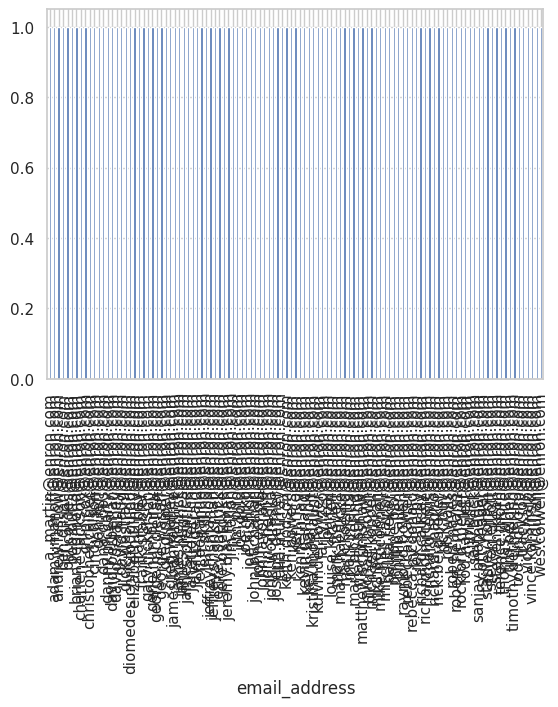

In [216]:
df.value_counts('email_address').plot.bar()

In [217]:
df.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
name                          object
dtype: object

In [218]:
poi_true = sum(df['poi'] == True)
poi_false = sum(df['poi'] == False)

print('Total de POIs:', poi_true)
print('Total de não-POIs:', poi_false)

Total de POIs: 18
Total de não-POIs: 128


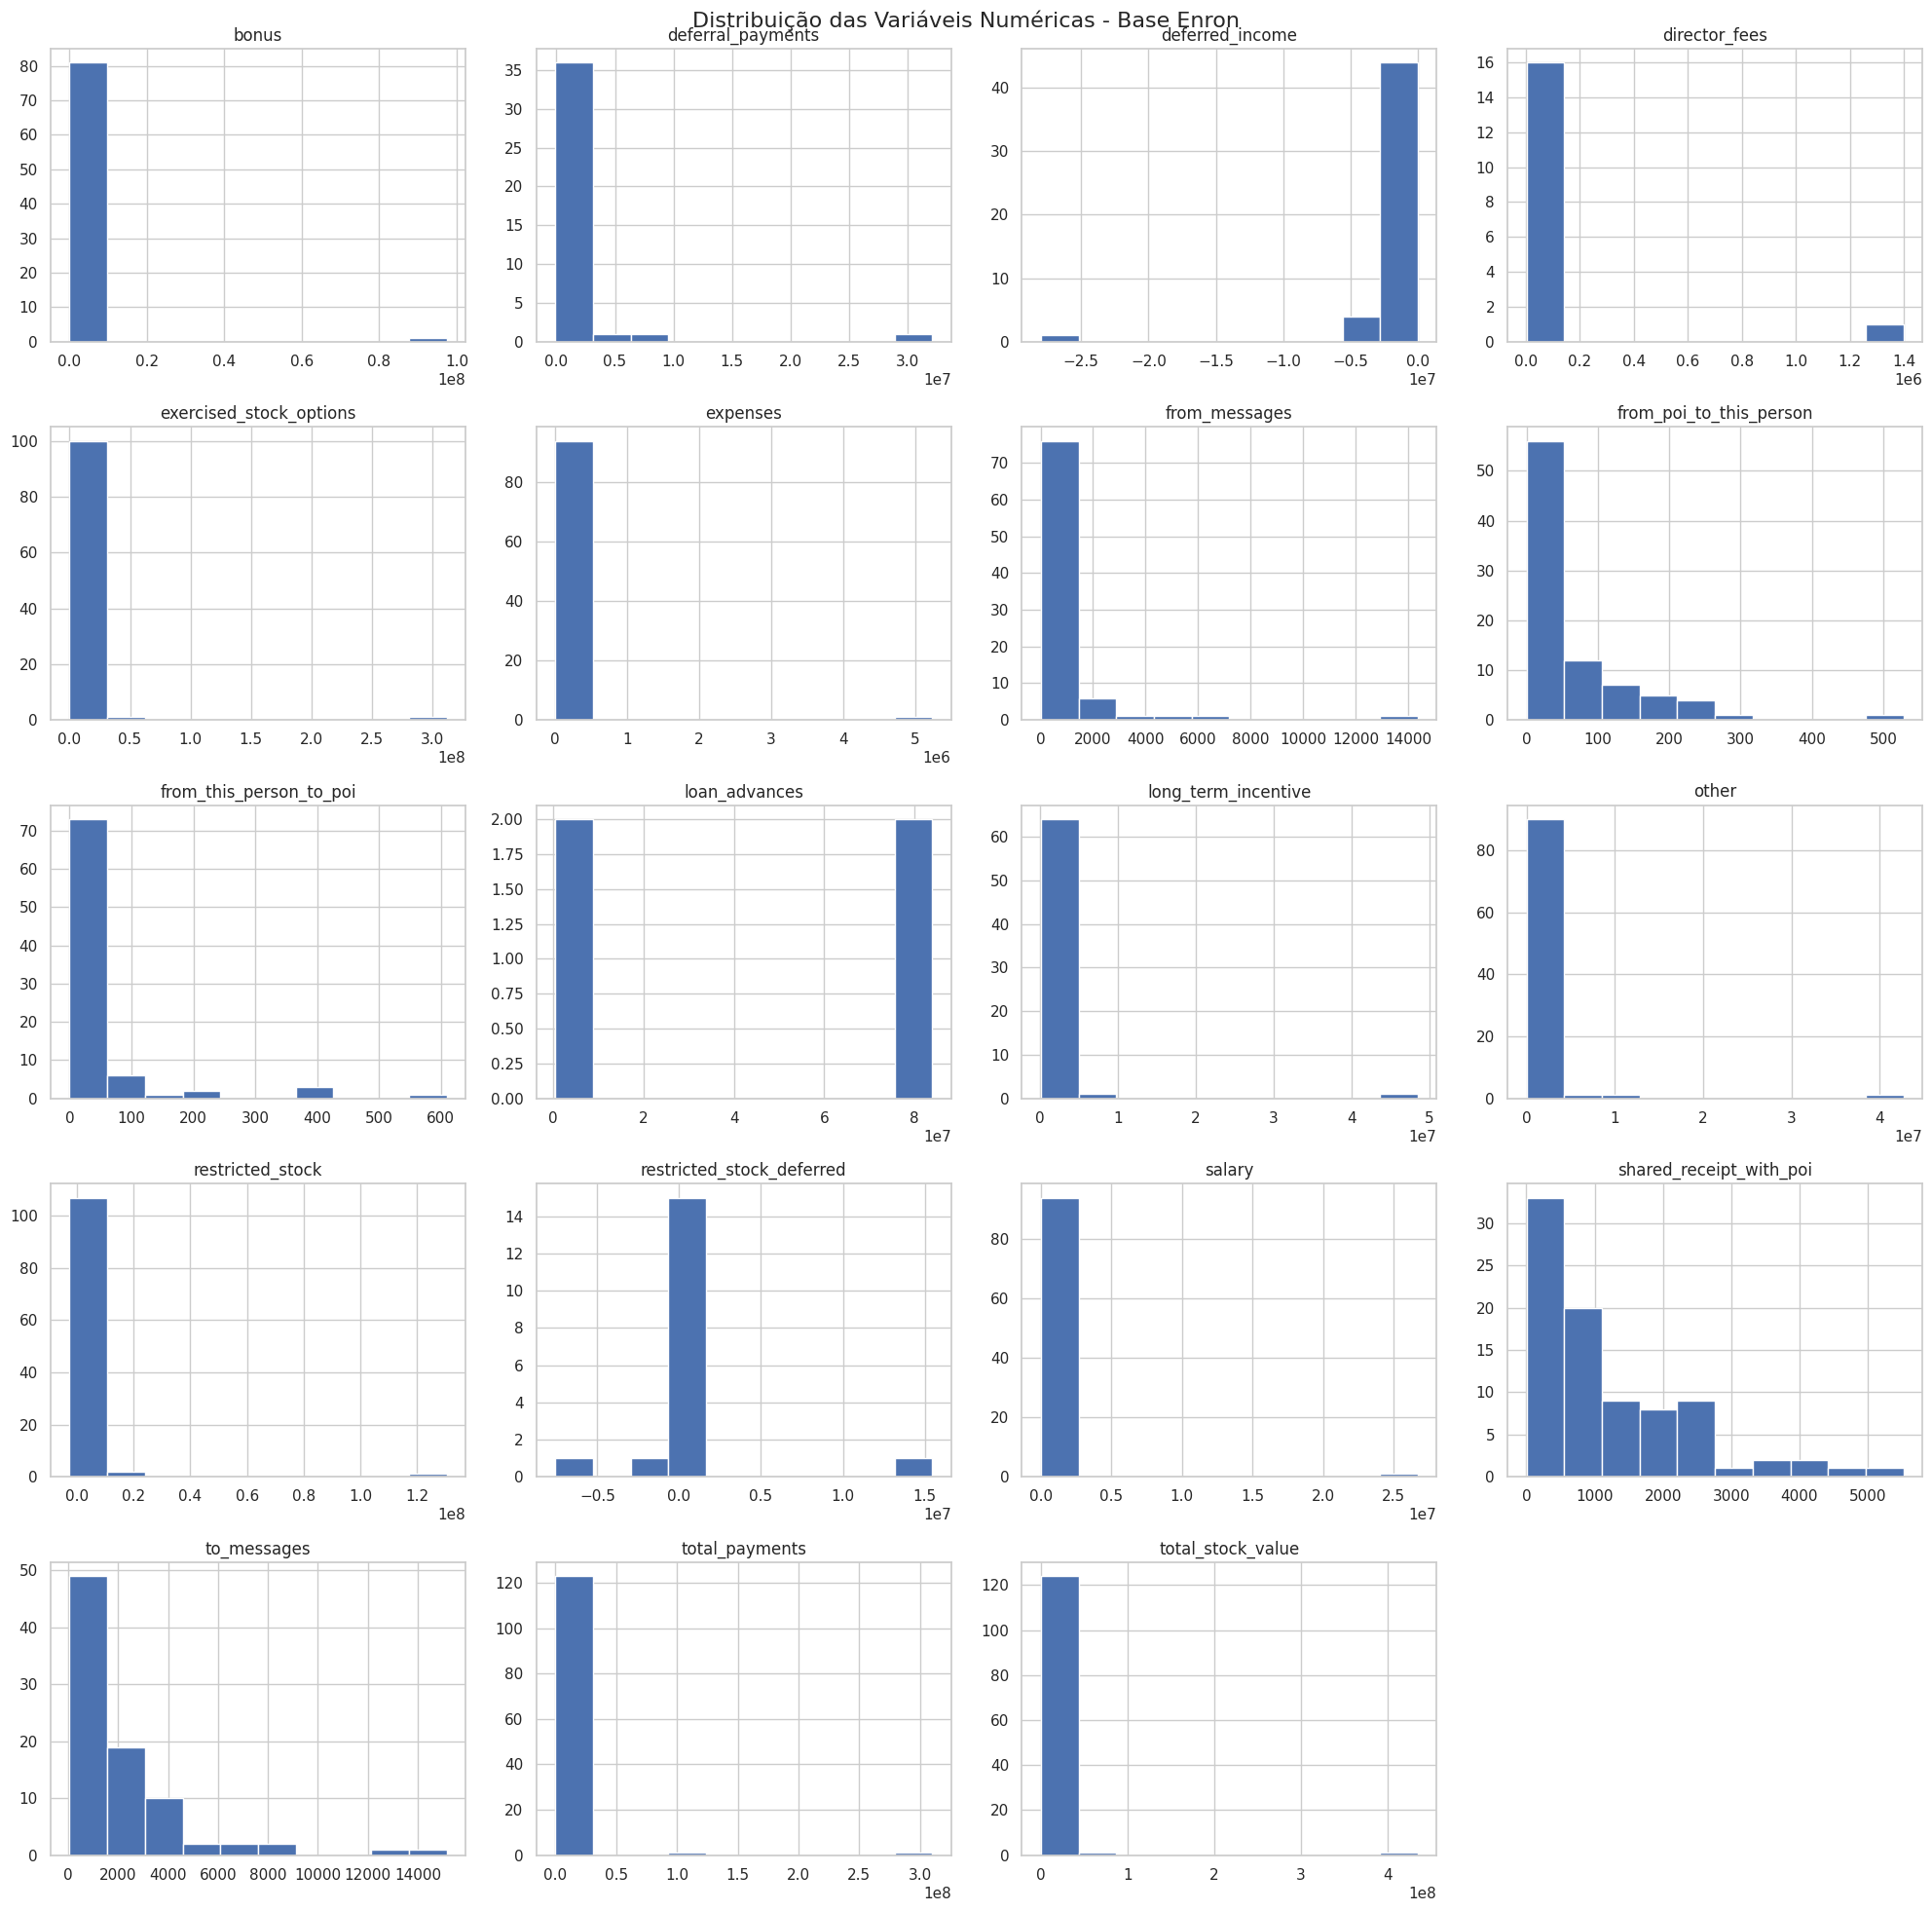

In [219]:
df.hist(figsize=(20, 20))
plt.suptitle('Distribuição das Variáveis Numéricas - Base Enron', fontsize=16)
plt.tight_layout()
plt.show()

In [220]:
# Resetar o DataFrame lendo o CSV novamente
df = pd.read_csv('enron.csv')

# Preencher com 0 onde fizer sentido
colunas_zero = ['bonus', 'expenses', 'other']
for col in colunas_zero:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Preencher com a mediana onde for mais adequado
colunas_mediana = ['salary', 'total_payments', 'restricted_stock']
for col in colunas_mediana:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [221]:
# Estatísticas descritivas principais
print("Estatísticas básicas:")
print(df.describe())

# Cálculos separados para reforçar interpretação
print("\nMédia (calculada separadamente):")
print(df.select_dtypes(include=np.number).mean())

print("\nDesvio padrão (calculado separadamente):")
print(df.select_dtypes(include=np.number).std())

print("\nMediana:")
print(df.select_dtypes(include=np.number).median())

print("\nVariância:")
print(df.select_dtypes(include=np.number).var())

print("\nQuartis:")
print(df.select_dtypes(include=np.number).quantile([0.25, 0.5, 0.75]))

Estatísticas básicas:
              bonus  deferral_payments  deferred_income  director_fees  \
count  1.460000e+02       3.900000e+01     4.900000e+01   1.700000e+01   
mean   1.333474e+06       1.642674e+06    -1.140475e+06   1.668049e+05   
std    8.094029e+06       5.161930e+06     4.025406e+06   3.198914e+05   
min    0.000000e+00      -1.025000e+05    -2.799289e+07   3.285000e+03   
25%    0.000000e+00       8.157300e+04    -6.948620e+05   9.878400e+04   
50%    3.000000e+05       2.274490e+05    -1.597920e+05   1.085790e+05   
75%    8.000000e+05       1.002672e+06    -3.834600e+04   1.137840e+05   
max    9.734362e+07       3.208340e+07    -8.330000e+02   1.398517e+06   

       exercised_stock_options      expenses  from_messages  \
count             1.020000e+02  1.460000e+02      86.000000   
mean              5.987054e+06  7.074827e+04     608.790698   
std               3.106201e+07  4.327163e+05    1841.033949   
min               3.285000e+03  0.000000e+00      12.000000

In [222]:
categoricas = df.select_dtypes(include='object')
for col in categoricas.columns:
    print(f"\nColuna: {col}")
    print("Moda:", df[col].mode(dropna=True)[0])
    print("Valores únicos:", df[col].nunique())


Coluna: email_address
Moda: a..martin@enron.com
Valores únicos: 111

Coluna: name
Moda: ALLEN PHILLIP K
Valores únicos: 146


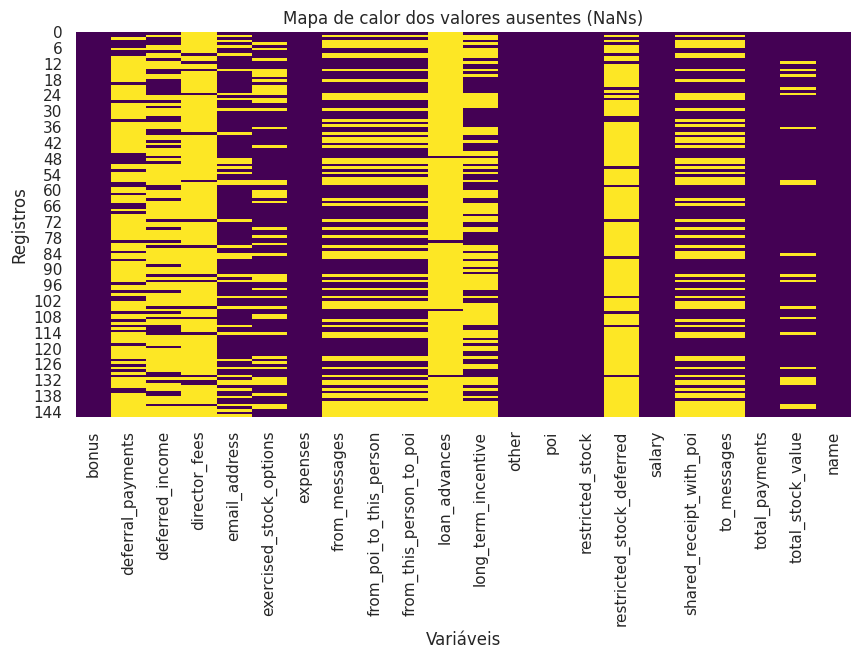

In [223]:
#Visualização dos NaNs por coluna (valores ausentes)
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor dos valores ausentes (NaNs)')
plt.xlabel('Variáveis')
plt.ylabel('Registros')
plt.show()

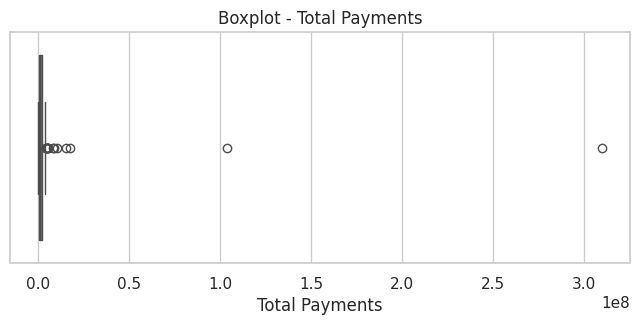

In [224]:
# Boxplot para detectar outliers em 'total_payments'
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['total_payments'].dropna())
plt.title('Boxplot - Total Payments')
plt.xlabel('Total Payments')
plt.show()

## **Etapa 1 – Análise Descritiva da Base de Dados**

Nesta etapa, fiz uma análise descritiva da base de dados da empresa Enron. O principal objetivo foi entender melhor como os dados estão organizados, verificar a existência de valores ausentes e explorar as variáveis disponíveis de forma estatística, buscando extrair algumas informações iniciais importantes.

Antes de começar o tratamento dos dados, fiz uma verificação geral da base para conhecer sua estrutura. Usei o método dtypes para identificar quais colunas eram numéricas e quais eram categóricas, o que foi essencial para saber como tratar os valores ausentes depois. Também utilizei o value_counts() na coluna email_address, o que me permitiu gerar um gráfico de barras e visualizar quantos registros havia por funcionário. Isso ajudou a perceber quais pessoas tinham mais dados associados, algo que pode ser útil em análises futuras, principalmente sobre comunicação interna ou envolvimento no caso de fraude.

Depois disso, calculei quantos registros foram marcados como POI (Person of Interest), ou seja, funcionários envolvidos na fraude. Fiz isso somando os valores True na coluna poi, e também contei os que foram marcados como False, ou seja, os que não estavam envolvidos. Ter essa separação clara entre POIs e não-POIs é importante para conseguir fazer comparações entre os grupos nas próximas etapas.

Ainda como parte da análise inicial, utilizei o comando df.hist() com o parâmetro figsize para gerar histogramas de todas as variáveis numéricas ao mesmo tempo. Isso me ajudou a observar, de forma geral, como os dados estão distribuídos, se há assimetrias, concentração em determinados valores e a presença de possíveis outliers. Essa visão geral foi bem útil para entender melhor o comportamento dos dados.

Na verificação inicial, notei que várias colunas continham valores ausentes (NaNs). Para evitar que isso atrapalhasse as análises, fiz alguns tratamentos. Nas colunas bonus, expenses e other, preenchi os valores ausentes com zero, considerando que a ausência desses dados provavelmente representa que o benefício ou despesa não aconteceu. Já nas variáveis numéricas mais importantes, como salary, total_payments e restricted_stock, preferi preencher os valores ausentes com a mediana, para evitar que outliers distorcessem os resultados. Outras colunas com muitos valores ausentes e que pareciam menos relevantes foram deixadas como estão. Para visualizar melhor os dados ausentes após esse tratamento, usei um heatmap, que me mostrou de forma gráfica quais colunas ainda apresentavam lacunas.

Depois de tratar os dados, calculei algumas estatísticas básicas das variáveis numéricas. Comecei com a função describe() e, em seguida, fiz os cálculos separados de média, mediana, desvio padrão, variância e quartis. Essas informações me ajudaram a entender melhor o comportamento das variáveis, identificar colunas com dados bem espalhados (como total_payments e exercised_stock_options) e perceber a presença de valores muito diferentes da média, indicando outliers.

Nas variáveis categóricas, analisei a moda (valor que mais se repete) e a quantidade de valores únicos em cada coluna. As colunas email_address e name foram consideradas apenas como identificadoras, então não usei elas nos cálculos estatísticos.

Além dos histogramas e do heatmap, utilizei dois gráficos extras para apoiar a análise: um boxplot da variável total_payments, que ajudou a visualizar a presença de outliers de forma clara, e um mapa de calor mostrando os NaNs, que foi útil para identificar quais variáveis ainda tinham problemas após o tratamento inicial. Esses gráficos ajudaram a confirmar e ilustrar os pontos que já tinham aparecido nas análises estatísticas.

Com as técnicas de preparação de dados, tratamento de valores ausentes, análises estatísticas e visualizações, finalizei esta primeira etapa com uma base mais organizada e pronta para as próximas análises. Foi possível entender melhor como os dados estão distribuídos, identificar colunas com problemas, perceber a presença de outliers e levantar hipóteses iniciais. Essa etapa foi importante para exercitar o olhar analítico e aplicar na prática os primeiros passos de um projeto real de análise de dados.

# **Etapa 2 – Análise Univariada de Dados**

Nesta etapa, realizarei uma análise univariada de cada variável da base Enron (exceto a variável `name`, que é apenas identificadora). O objetivo é observar o comportamento individual de cada variável, sua distribuição, presença de outliers, assimetria e possíveis concentrações de dados.

## Variável: salary

**Descrição:**  
Esta variável representa o salário anual de cada funcionário da Enron.

**Objetivo da análise:**  
Investigar a distribuição dos salários e identificar possíveis outliers ou padrões relevantes.


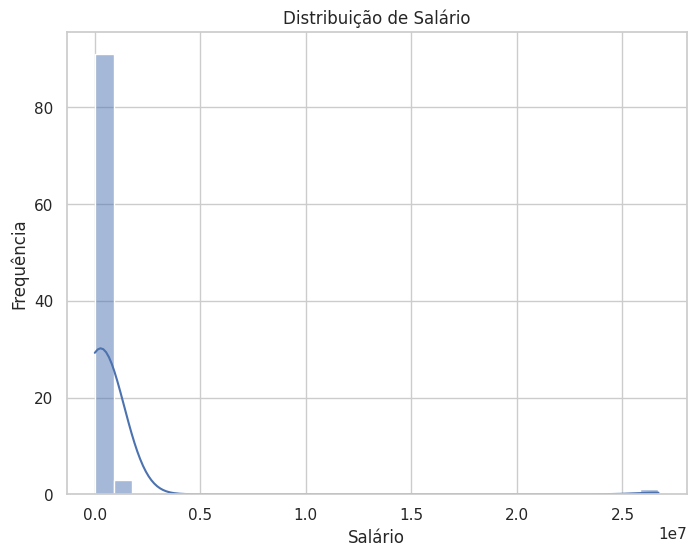

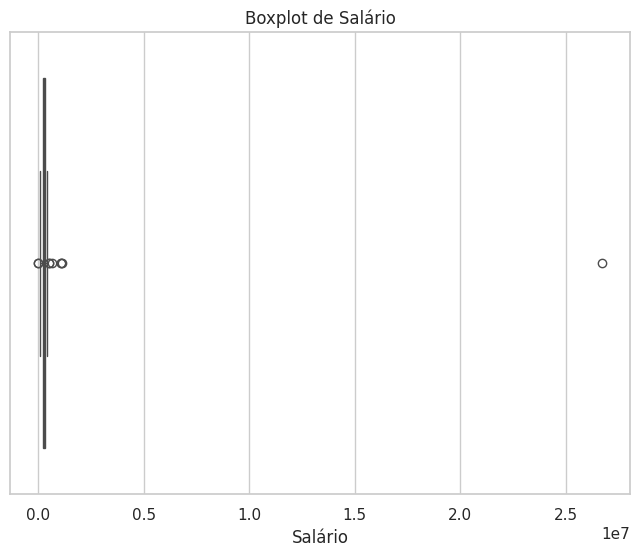

In [270]:
# Histograma para visualizar a distribuição de 'salary'
plt.figure(figsize=(8, 6))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Distribuição de Salário')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

# Boxplot para detectar outliers na variável 'salary'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary'])
plt.title('Boxplot de Salário')
plt.xlabel('Salário')
plt.show()

**Análise:**

A variável salary apresenta uma distribuição assimétrica, com a maioria dos funcionários concentrada em faixas salariais mais baixas e alguns registros com valores extremamente altos, que se destacam como outliers. Esses valores elevados podem indicar a presença de altos executivos ou cargos estratégicos na empresa. O histograma permite visualizar essa concentração e a cauda longa da distribuição, enquanto o boxplot evidencia claramente os salários que fogem do padrão geral. Essa diferença nos salários pode ser relevante em etapas posteriores, especialmente ao investigar a relação entre remuneração e participação em práticas irregulares, como as observadas no escândalo da Enron.


## Variável: Bonus

**Descrição:**  
Esta variável representa os bônus anuais recebidos pelos funcionários da Enron.

**Objetivo da análise:**  
Verificar como os bônus estão distribuídos, a frequência de valores ausentes e identificar a presença de outliers.



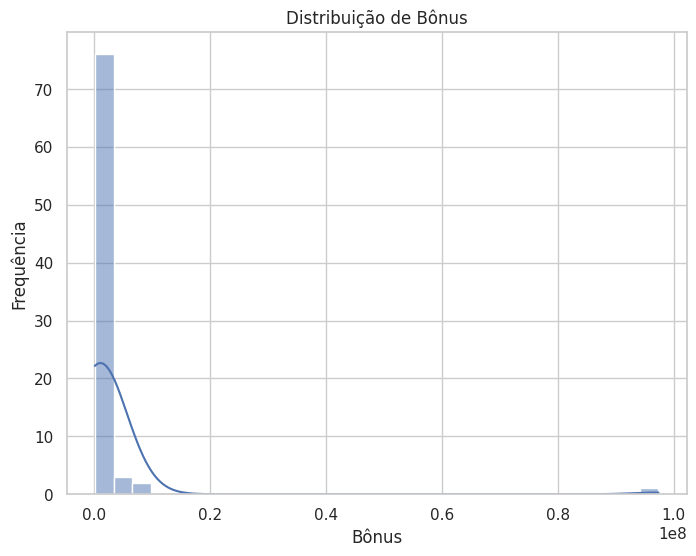

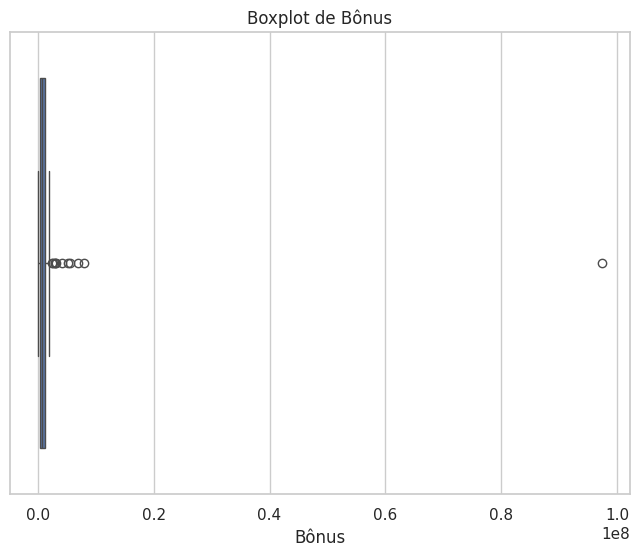

In [271]:
# Histograma da variável 'bonus'
plt.figure(figsize=(8, 6))
sns.histplot(df['bonus'], bins=30, kde=True)
plt.title('Distribuição de Bônus')
plt.xlabel('Bônus')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'bonus'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bonus'])
plt.title('Boxplot de Bônus')
plt.xlabel('Bônus')
plt.show()

**Análise:**

A variável bonus apresenta uma distribuição fortemente assimétrica à direita, com muitos funcionários recebendo valores baixos ou nenhum bônus, e poucos registros concentrando valores extremamente elevados. Como a ausência de bônus provavelmente indica que esse benefício não foi concedido, optei por preencher os valores ausentes com zero, o que faz sentido dentro do contexto da empresa. O histograma mostra claramente essa concentração em zero e uma cauda longa indicando altos valores em poucos casos, enquanto o boxplot evidencia diversos outliers — alguns ultrapassando 90 milhões de dólares. Esses valores extremos podem indicar cargos de alto escalão ou participação direta em decisões estratégicas. A análise sugere que a concessão de bônus era restrita a uma minoria privilegiada, o que pode ser relevante ao cruzar esses dados com o grupo de POIs nas próximas etapas.

## Variável: expenses

**Descrição:**  
A variável `expenses` representa despesas reembolsadas ou diretamente associadas ao funcionário.

**Objetivo da análise:**  
Observar a distribuição dos valores de despesas, a frequência de valores baixos ou ausentes, e verificar a existência de valores extremos.


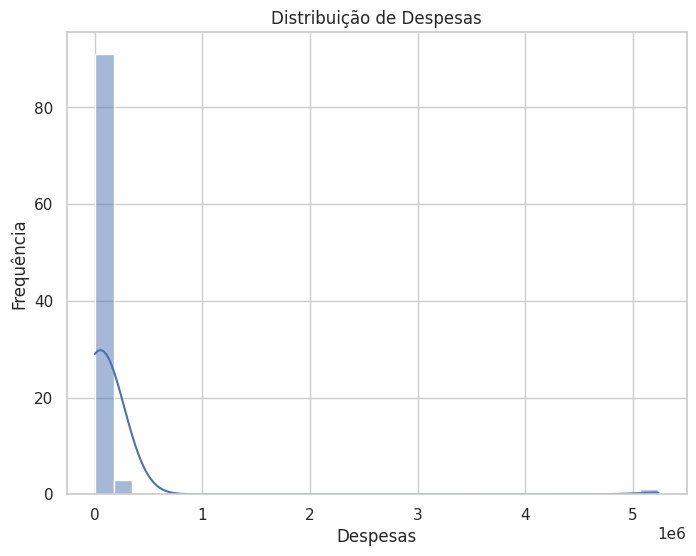

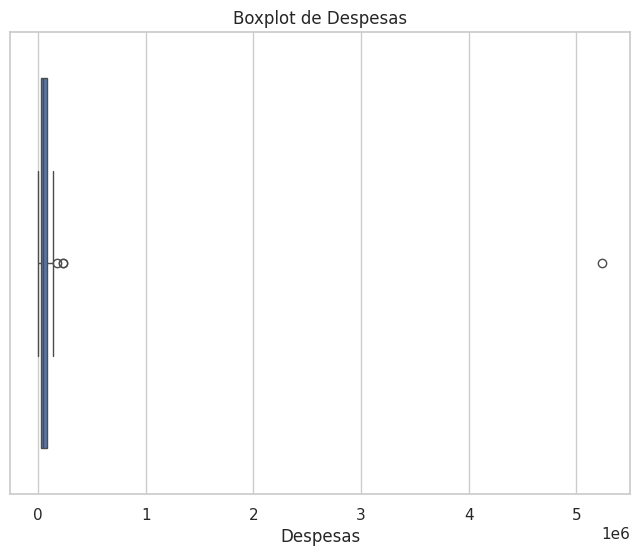

In [272]:
# Histograma da variável 'expenses'
plt.figure(figsize=(8, 6))
sns.histplot(df['expenses'], bins=30, kde=True)
plt.title('Distribuição de Despesas')
plt.xlabel('Despesas')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'expenses'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['expenses'])
plt.title('Boxplot de Despesas')
plt.xlabel('Despesas')
plt.show()

**Análise:**  
A variável expenses apresenta uma distribuição bastante assimétrica, com grande parte dos funcionários registrando valores muito baixos ou zero, o que provavelmente indica que não tiveram despesas reembolsadas no período analisado. Por isso, optei por preencher os valores ausentes com zero, já que a ausência desses dados reflete, na prática, a não ocorrência do gasto. O histograma mostra essa concentração inicial e uma cauda longa com poucos funcionários que tiveram despesas elevadas, enquanto o boxplot evidencia diversos outliers, com valores que ultrapassam 5 milhões de dólares. Isso pode indicar que alguns cargos tinham maior autonomia para realizar gastos, o que pode ser relevante em uma investigação sobre uso indevido de recursos corporativos.




## Variável: total_payments

**Descrição:**  
A variável `total_payments` representa a soma de todos os pagamentos feitos ao funcionário, incluindo salário, bônus, reembolsos, incentivos e outros valores financeiros.

**Objetivo da análise:**  
Analisar a distribuição total dos pagamentos, identificar padrões de concentração e detectar possíveis outliers que indiquem irregularidades ou privilégios excessivos.

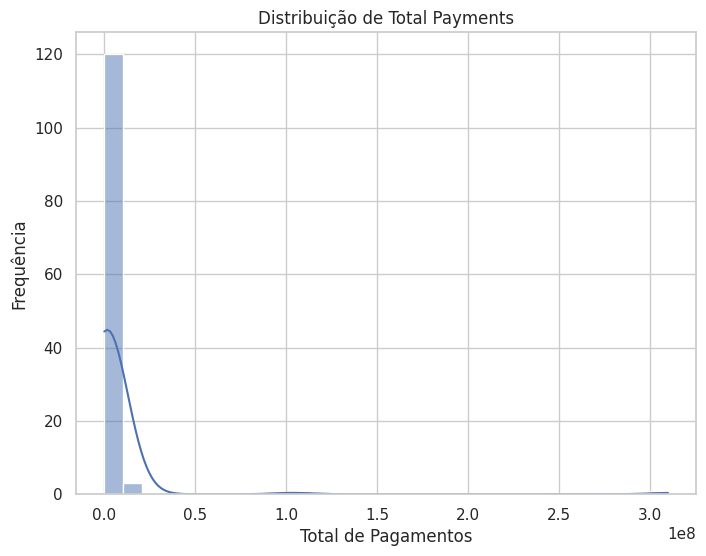

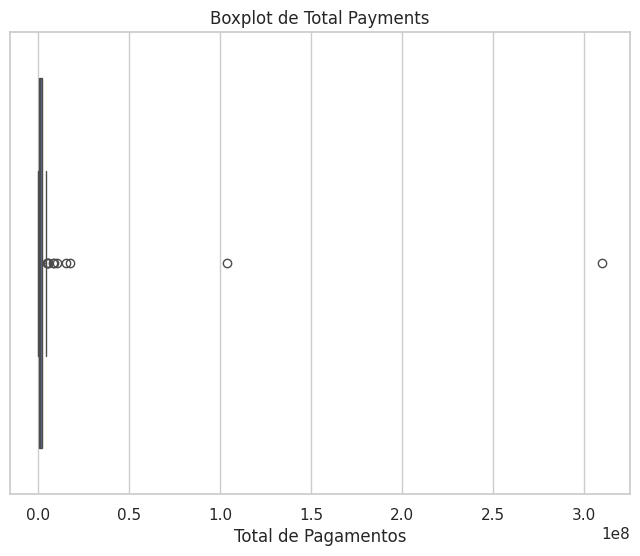

In [273]:
# Histograma da variável 'total_payments'
plt.figure(figsize=(8, 6))
sns.histplot(df['total_payments'], bins=30, kde=True)
plt.title('Distribuição de Total Payments')
plt.xlabel('Total de Pagamentos')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'total_payments'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_payments'])
plt.title('Boxplot de Total Payments')
plt.xlabel('Total de Pagamentos')
plt.show()

**Análise:**  
A variável `total_payments` apresenta uma distribuição altamente assimétrica, com a maioria dos registros concentrada em valores baixos, e poucos casos com pagamentos muito elevados. O boxplot confirma a existência de diversos outliers, com valores significativamente fora da média. Esses registros podem estar associados a executivos ou a casos suspeitos, como distribuição indevida de bônus ou benefícios. Esta variável será importante para investigações cruzadas nas etapas seguintes.


## Variável: total_stock_value

**Descrição:**  
A variável `total_stock_value` representa o valor total em ações associado ao funcionário, somando ações restritas, opções exercidas e outras participações acionárias.

**Objetivo da análise:**  
Avaliar a distribuição do valor em ações entre os funcionários, identificar concentração patrimonial e detectar valores fora do padrão.

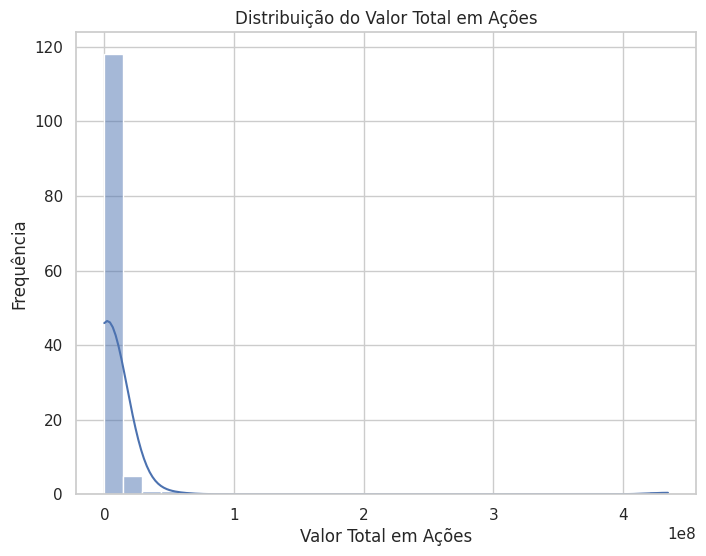

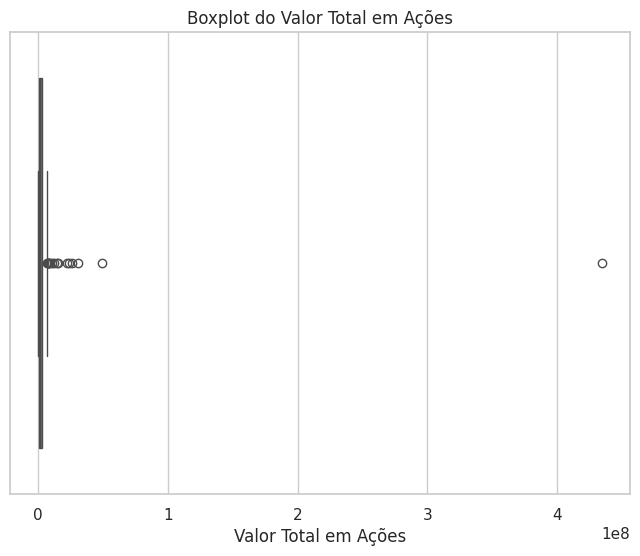

In [274]:
# Histograma da variável 'total_stock_value'
plt.figure(figsize=(8, 6))
sns.histplot(df['total_stock_value'], bins=30, kde=True)
plt.title('Distribuição do Valor Total em Ações')
plt.xlabel('Valor Total em Ações')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'total_stock_value'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_stock_value'])
plt.title('Boxplot do Valor Total em Ações')
plt.xlabel('Valor Total em Ações')
plt.show()

**Análise:**  
A variável total_stock_value apresenta uma distribuição bastante assimétrica à direita, com a maior parte dos funcionários concentrando valores baixos de participação acionária, enquanto poucos registros se destacam com valores extremamente elevados — alguns ultrapassando os 400 milhões de dólares. Essa desigualdade patrimonial fica evidente tanto no histograma quanto no boxplot, que mostra diversos outliers. Isso indica que apenas uma minoria detinha grandes quantias em ações, possivelmente vinculada à liderança da empresa ou a decisões estratégicas. Por esse motivo, considero essa variável importante para as análises cruzadas com o grupo de POIs e outras métricas financeiras, pois pode revelar vínculos diretos com movimentações irregulares de capital.

## Variável: restricted_stock

**Descrição:**  
A variável `restricted_stock` indica o valor em ações restritas concedidas ao funcionário, geralmente vinculadas a permanência na empresa ou a metas específicas.

**Objetivo da análise:**  
Observar como essas ações estão distribuídas, identificar a frequência de concessão e possíveis disparidades entre funcionários.

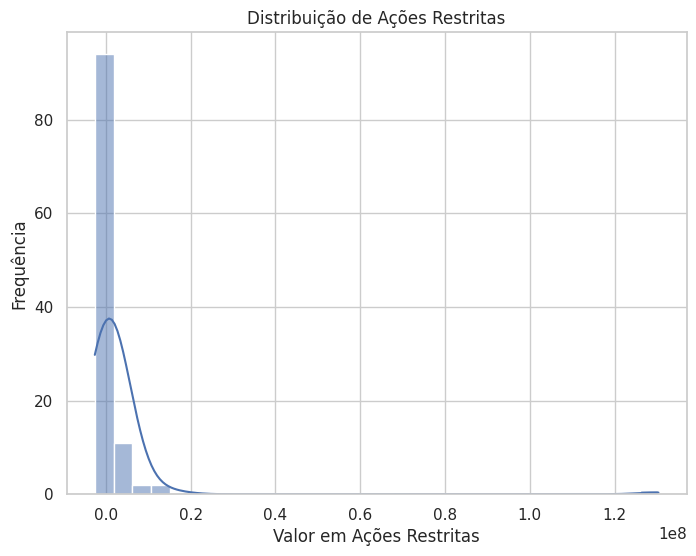

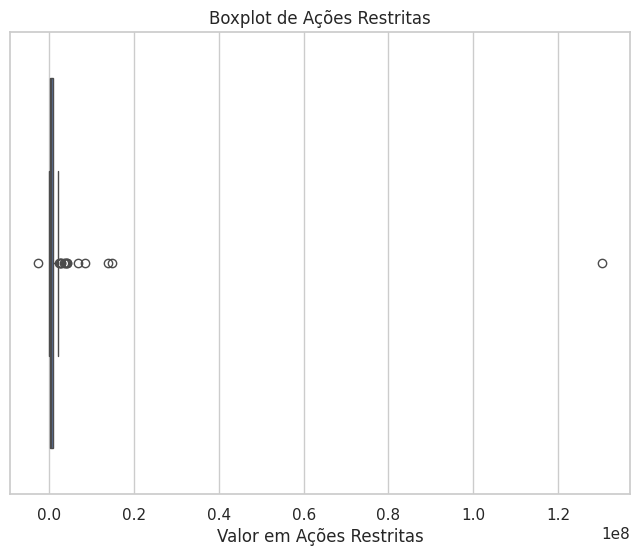

In [275]:
# Histograma da variável 'restricted_stock'
plt.figure(figsize=(8, 6))
sns.histplot(df['restricted_stock'], bins=30, kde=True)
plt.title('Distribuição de Ações Restritas')
plt.xlabel('Valor em Ações Restritas')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'restricted_stock'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['restricted_stock'])
plt.title('Boxplot de Ações Restritas')
plt.xlabel('Valor em Ações Restritas')
plt.show()


**Análise:**  
A variável restricted_stock apresenta uma distribuição assimétrica com concentração em valores baixos e diversos outliers, incluindo registros com ações restritas que ultrapassam os 100 milhões de dólares. O histograma mostra essa disparidade, enquanto o boxplot destaca as concessões excepcionais feitas a uma pequena parcela dos funcionários. Também há casos com valores negativos, o que pode indicar ajustes contábeis ou reversões. Essa distribuição desigual sugere que as ações restritas foram majoritariamente concedidas a executivos ou pessoas com papel estratégico na empresa. Por isso, considero essa variável importante para investigar possíveis vínculos entre benefícios acionários e a participação de funcionários no esquema de fraude.



## Variável: exercised_stock_options

**Descrição:**  
A variável `exercised_stock_options` representa o valor financeiro obtido por um funcionário ao exercer suas opções de ações, ou seja, quando ele transformou seu direito de compra em ações reais da empresa.

**Objetivo da análise:**  
Verificar quais funcionários exerceram grandes quantidades de ações, identificar outliers e entender a concentração de ganhos financeiros via opções.


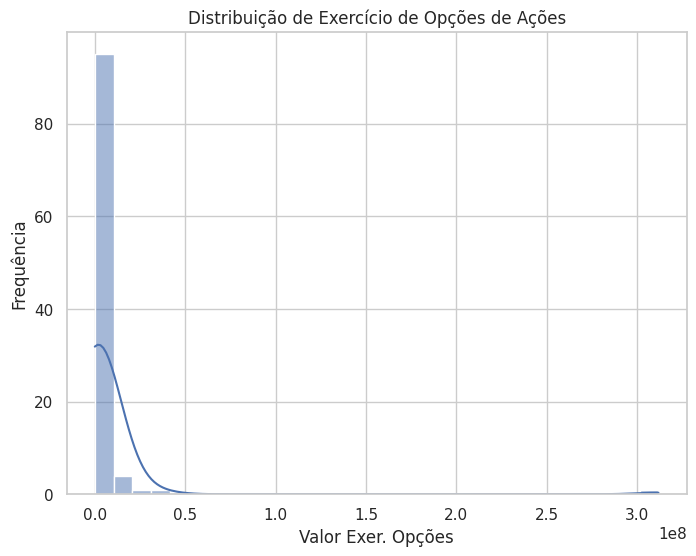

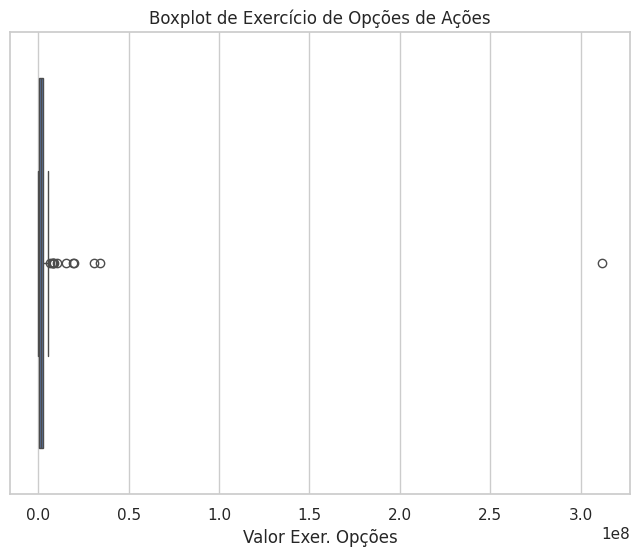

In [276]:
# Histograma da variável 'exercised_stock_options'
plt.figure(figsize=(8, 6))
sns.histplot(df['exercised_stock_options'], bins=30, kde=True)
plt.title('Distribuição de Exercício de Opções de Ações')
plt.xlabel('Valor Exer. Opções')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'exercised_stock_options'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['exercised_stock_options'])
plt.title('Boxplot de Exercício de Opções de Ações')
plt.xlabel('Valor Exer. Opções')
plt.show()

**Análise:**  
A variável exercised_stock_options apresenta uma distribuição altamente assimétrica, com a maioria dos funcionários não exercendo opções de ações ou registrando valores muito baixos, enquanto uma minoria realizou ganhos financeiros expressivos — alguns acima de 300 milhões de dólares. O histograma mostra essa disparidade, e o boxplot evidencia diversos outliers que se distanciam fortemente da média. Esses registros extremos indicam que poucos funcionários, possivelmente executivos, exerceram grandes volumes de ações, o que pode estar relacionado a decisões internas privilegiadas ou ao uso de informações estratégicas. Por isso, essa variável é essencial para entender a movimentação patrimonial de quem esteve mais próximo do núcleo decisório da empresa.



## Variável: from_messages

**Descrição:**  
A variável `from_messages` indica o número total de e-mails enviados por cada funcionário da Enron.

**Objetivo da análise:**  
Verificar o padrão de envio de mensagens na empresa, identificar usuários altamente ativos e a existência de outliers.

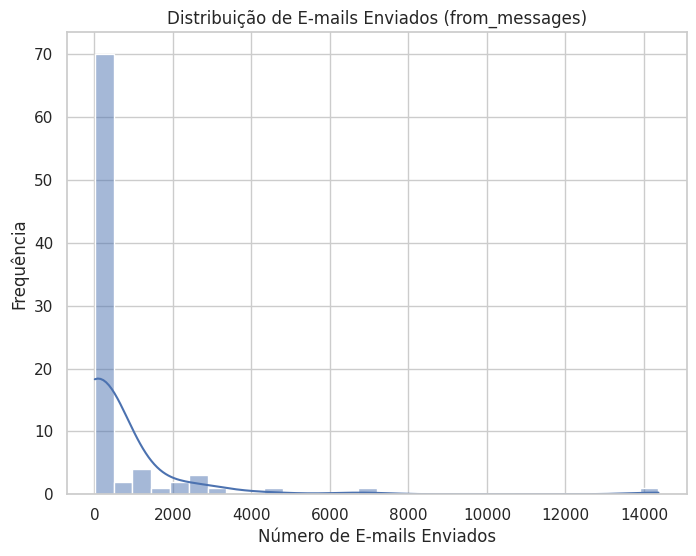

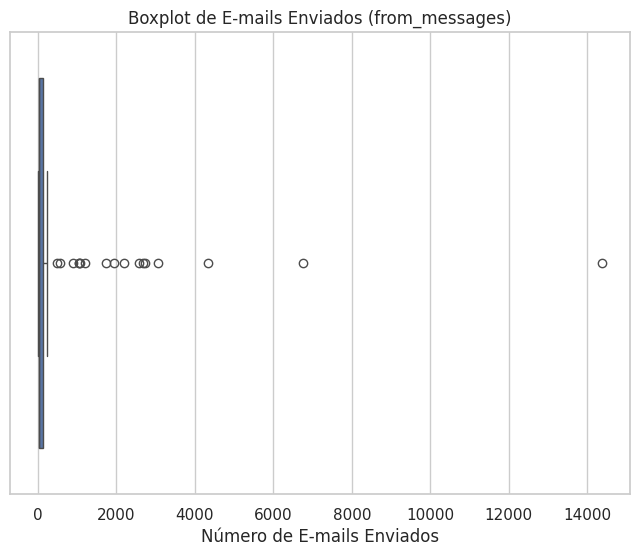

In [277]:
# Histograma da variável 'from_messages'
plt.figure(figsize=(8, 6))
sns.histplot(df['from_messages'], bins=30, kde=True)
plt.title('Distribuição de E-mails Enviados (from_messages)')
plt.xlabel('Número de E-mails Enviados')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'from_messages'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['from_messages'])
plt.title('Boxplot de E-mails Enviados (from_messages)')
plt.xlabel('Número de E-mails Enviados')
plt.show()

**Análise:**  
A distribuição de `from_messages` mostra que a maioria dos funcionários enviou uma quantidade relativamente baixa de e-mails. Existem alguns casos com alta atividade, caracterizados como outliers no boxplot. Esses valores podem indicar funções operacionais específicas, como atendimento ou liderança de projetos, e serão úteis em análises cruzadas com variáveis como `poi` ou `from_this_person_to_poi`.

## Variável: to_messages

**Descrição:**  
A variável `to_messages` representa o número total de e-mails recebidos por cada funcionário da Enron.

**Objetivo da análise:**  
Entender o volume de comunicações recebidas, identificar padrões de troca de informações e verificar a presença de funcionários que atuavam como centros de contato.

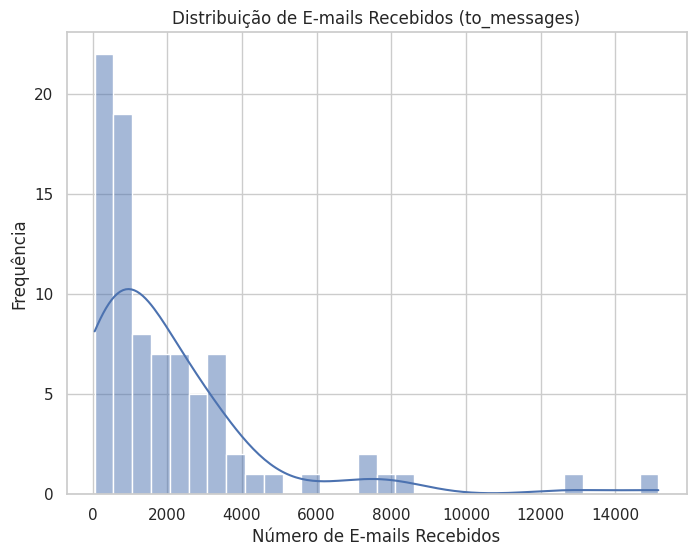

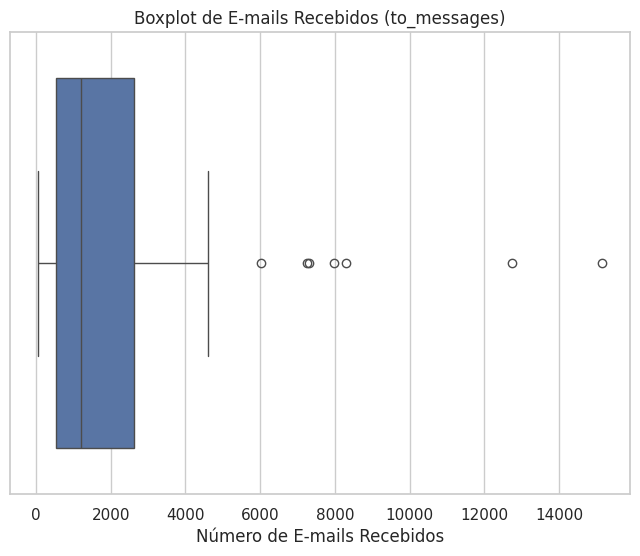

In [278]:
# Histograma da variável 'to_messages'
plt.figure(figsize=(8, 6))
sns.histplot(df['to_messages'], bins=30, kde=True)
plt.title('Distribuição de E-mails Recebidos (to_messages)')
plt.xlabel('Número de E-mails Recebidos')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'to_messages'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['to_messages'])
plt.title('Boxplot de E-mails Recebidos (to_messages)')
plt.xlabel('Número de E-mails Recebidos')
plt.show()

**Análise:**  
A variável to_messages apresenta uma distribuição assimétrica à direita, com a maioria dos funcionários recebendo poucos e-mails — geralmente abaixo de 1000 — enquanto alguns registros se destacam com volumes extremamente altos, chegando a mais de 15 mil mensagens. Essa discrepância pode ser observada no histograma, que mostra a concentração em faixas mais baixas, e no boxplot, que revela diversos outliers. Esses casos podem indicar funcionários que atuavam como centros de comunicação, em funções de liderança, secretariado ou gestão de informações. Por isso, considero essa variável relevante para investigações cruzadas com shared_receipt_with_poi e poi, pois pode ajudar a identificar quem estava mais conectado aos fluxos informacionais da empresa, inclusive com os envolvidos na fraude.



## Variável: from_poi_to_this_person

**Descrição:**  
Essa variável indica quantos e-mails foram enviados de pessoas de interesse (POIs) para o funcionário correspondente.

**Objetivo da análise:**  
Avaliar o nível de comunicação dos funcionários com POIs, o que pode indicar proximidade ou envolvimento com os principais nomes do escândalo.

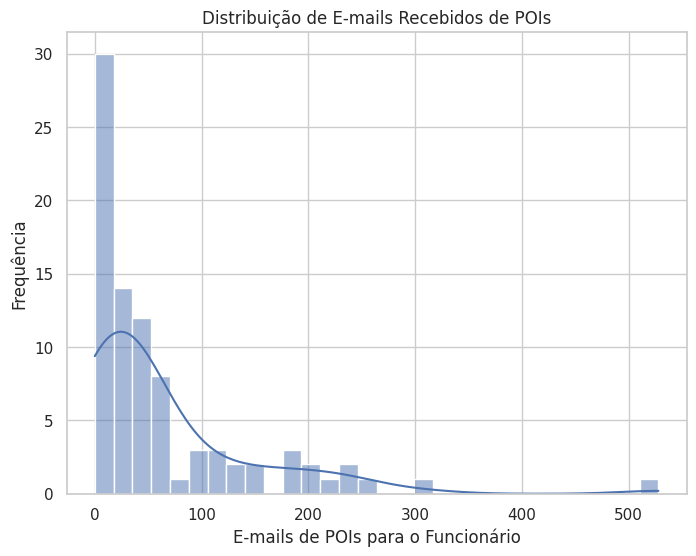

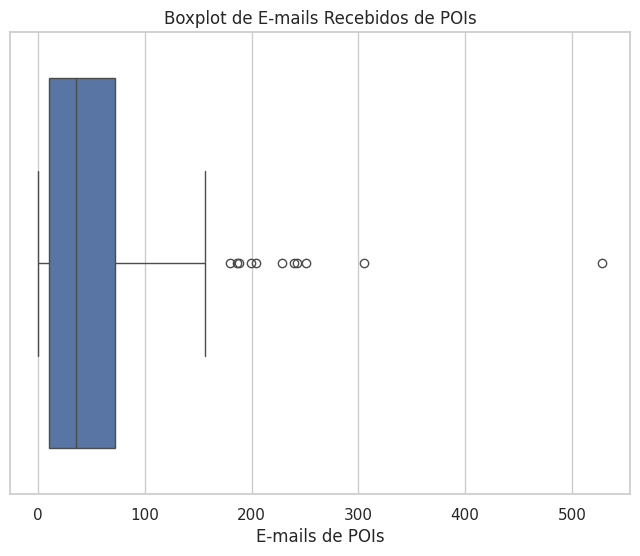

In [279]:
# Histograma da variável 'from_poi_to_this_person'
plt.figure(figsize=(8, 6))
sns.histplot(df['from_poi_to_this_person'], bins=30, kde=True)
plt.title('Distribuição de E-mails Recebidos de POIs')
plt.xlabel('E-mails de POIs para o Funcionário')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'from_poi_to_this_person'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['from_poi_to_this_person'])
plt.title('Boxplot de E-mails Recebidos de POIs')
plt.xlabel('E-mails de POIs')
plt.show()

**Análise:**  
A variável from_poi_to_this_person apresenta uma distribuição concentrada em valores baixos, indicando que a maioria dos funcionários recebeu poucas mensagens de POIs — muitas vezes nenhuma. No entanto, o boxplot revela alguns outliers relevantes, com funcionários que chegaram a receber mais de 500 e-mails vindos diretamente de pessoas envolvidas na fraude. Essa diferença é importante, pois pode indicar proximidade, influência ou alinhamento com o núcleo central do escândalo. Por isso, considero essa variável essencial para as próximas análises cruzadas com poi e from_this_person_to_poi, já que o volume de comunicação recebida de POIs pode sugerir níveis distintos de envolvimento ou conhecimento sobre as práticas irregulares da empresa.


## Variável: from_this_person_to_poi

**Descrição:**  
Essa variável indica quantos e-mails o funcionário enviou diretamente para pessoas de interesse (POIs).

**Objetivo da análise:**  
Analisar a frequência de comunicação ativa dos funcionários com os POIs, o que pode indicar relações diretas, envolvimento ou alinhamento com os principais suspeitos da fraude.

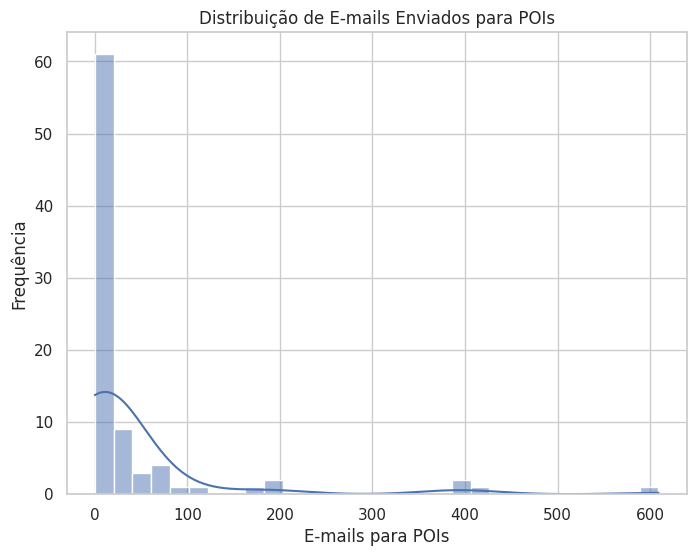

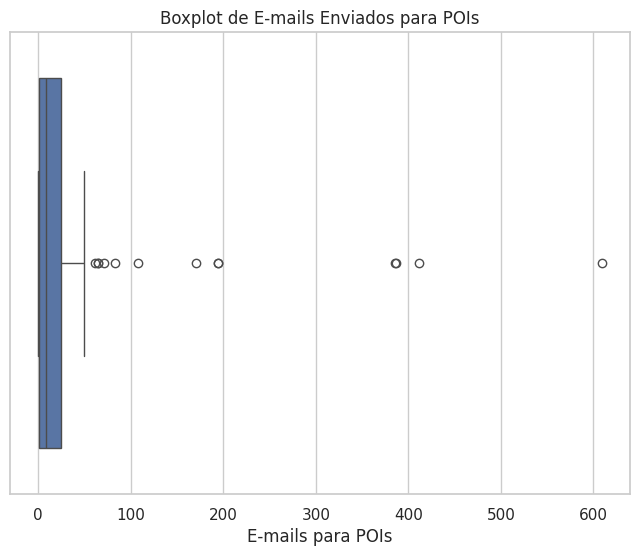

In [280]:
# Histograma da variável 'from_this_person_to_poi'
plt.figure(figsize=(8, 6))
sns.histplot(df['from_this_person_to_poi'], bins=30, kde=True)
plt.title('Distribuição de E-mails Enviados para POIs')
plt.xlabel('E-mails para POIs')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'from_this_person_to_poi'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['from_this_person_to_poi'])
plt.title('Boxplot de E-mails Enviados para POIs')
plt.xlabel('E-mails para POIs')
plt.show()

**Análise:**  
A variável from_this_person_to_poi apresenta uma distribuição fortemente assimétrica, com a maioria dos funcionários enviando poucos ou nenhum e-mail diretamente para pessoas de interesse. O histograma mostra essa concentração inicial, enquanto o boxplot evidencia outliers importantes, com casos de funcionários que chegaram a enviar mais de 600 mensagens para POIs. Esse padrão é bastante relevante, pois a comunicação ativa com os principais envolvidos pode sugerir alinhamento, colaboração ou ao menos proximidade operacional com o grupo central do escândalo. Por isso, considero essa variável estratégica para as próximas análises, especialmente ao lado de from_poi_to_this_person e da própria variável poi.

## Variável: shared_receipt_with_poi

**Descrição:**  
Essa variável representa a quantidade de e-mails que o funcionário recebeu e que também foram enviados para, ou incluíam em cópia, uma pessoa de interesse (POI).

**Objetivo da análise:**  
Verificar o nível de envolvimento indireto dos funcionários com POIs, por meio de mensagens em comum, mesmo que o contato não tenha sido direto.

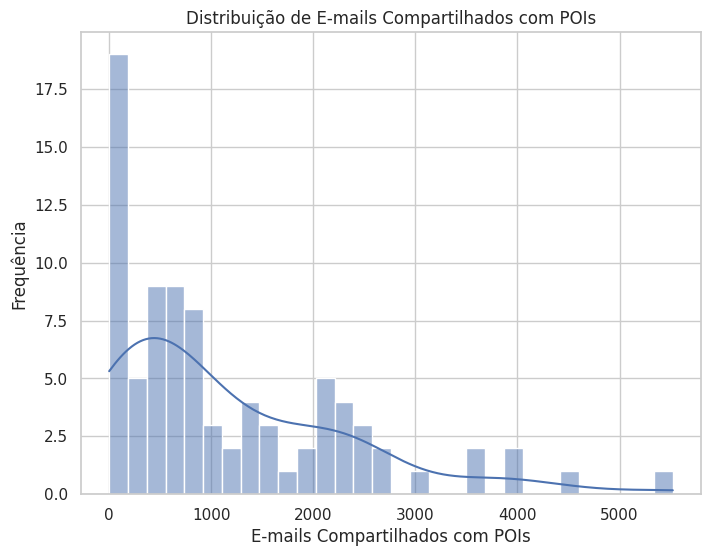

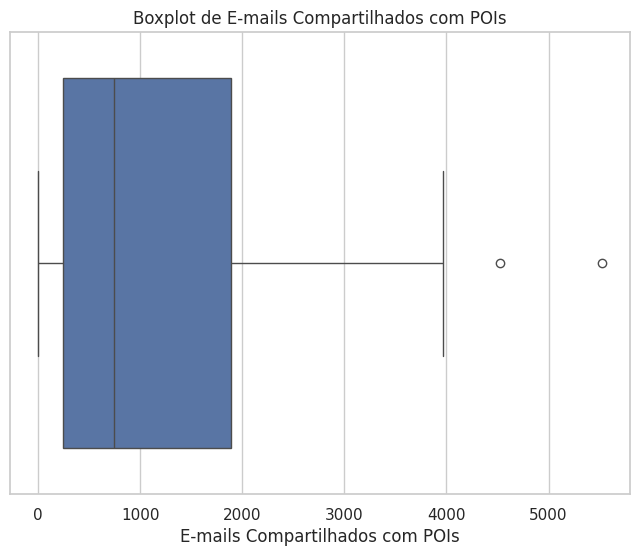

In [281]:
# Histograma da variável 'shared_receipt_with_poi'
plt.figure(figsize=(8, 6))
sns.histplot(df['shared_receipt_with_poi'], bins=30, kde=True)
plt.title('Distribuição de E-mails Compartilhados com POIs')
plt.xlabel('E-mails Compartilhados com POIs')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'shared_receipt_with_poi'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['shared_receipt_with_poi'])
plt.title('Boxplot de E-mails Compartilhados com POIs')
plt.xlabel('E-mails Compartilhados com POIs')
plt.show()

**Análise:**  
A variável shared_receipt_with_poi revela o número de mensagens que um funcionário recebeu e que também foram compartilhadas com POIs, mesmo que o envio não tenha sido direto. A distribuição é assimétrica, com muitos funcionários apresentando valores baixos, mas alguns se destacando com mais de 5 mil mensagens em comum com pessoas envolvidas no escândalo. O histograma mostra essa disparidade, e o boxplot evidencia os outliers de forma clara. Essa variável é valiosa porque ajuda a identificar funcionários que, embora não se comunicassem diretamente com os POIs, estavam inseridos em contextos informacionais próximos a eles — o que pode indicar conhecimento indireto ou envolvimento passivo em decisões suspeitas. Por isso, pretendo utilizá-la em conjunto com outras variáveis de e-mail nas análises cruzadas.

## Variável: loan_advances

**Descrição:**  
A variável `loan_advances` representa adiantamentos ou empréstimos feitos pela empresa a determinados funcionários.

**Objetivo da análise:**  
Verificar a ocorrência de adiantamentos, identificar se são comuns ou concentrados em poucos indivíduos e observar a presença de valores extremos.


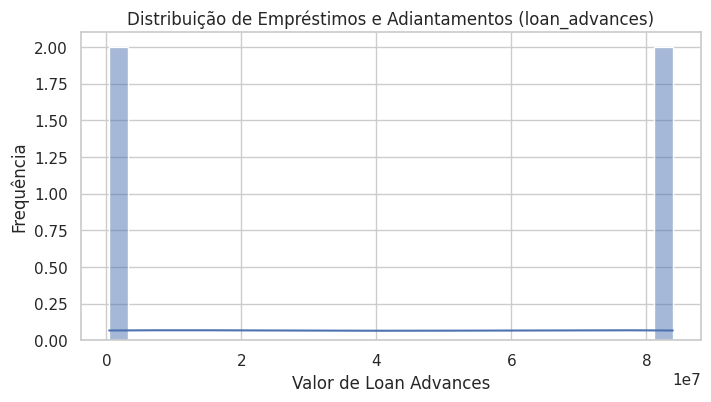

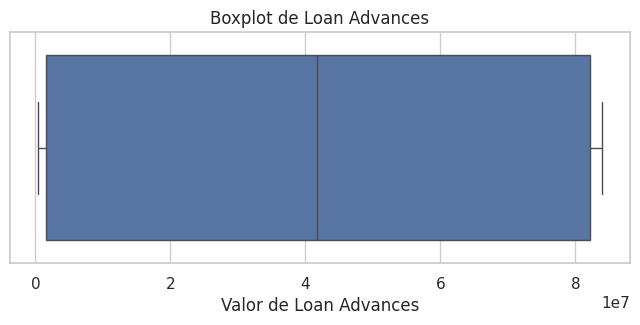

In [237]:
# Histograma da variável 'loan_advances'
plt.figure(figsize=(8, 4))
sns.histplot(df['loan_advances'], bins=30, kde=True)
plt.title('Distribuição de Empréstimos e Adiantamentos (loan_advances)')
plt.xlabel('Valor de Loan Advances')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'loan_advances'
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['loan_advances'])
plt.title('Boxplot de Loan Advances')
plt.xlabel('Valor de Loan Advances')
plt.show()


**Análise:**  
A variável loan_advances apresenta uma distribuição extremamente concentrada em zero, indicando que a grande maioria dos funcionários não recebeu adiantamentos ou empréstimos da empresa. Apenas quatro registros estão preenchidos, e todos com valores expressivos, acima de 40 milhões de dólares. O histograma mostra essa concentração e o boxplot evidencia os outliers de forma clara. Apesar do número reduzido de casos, essa variável tem um peso analítico importante, pois indica situações excepcionais que merecem atenção. Esses empréstimos milionários podem revelar relações de confiança ou favorecimento direto, e por isso pretendo considerá-los com cuidado nas análises cruzadas com a variável poi.



## Variável: long_term_incentive

**Descrição:**  
A variável `long_term_incentive` representa valores recebidos pelos funcionários como incentivos de longo prazo, geralmente atrelados a metas de desempenho ou permanência na empresa.

**Objetivo da análise:**  
Avaliar como esses incentivos foram distribuídos entre os funcionários e identificar possíveis disparidades ou concessões excessivas.

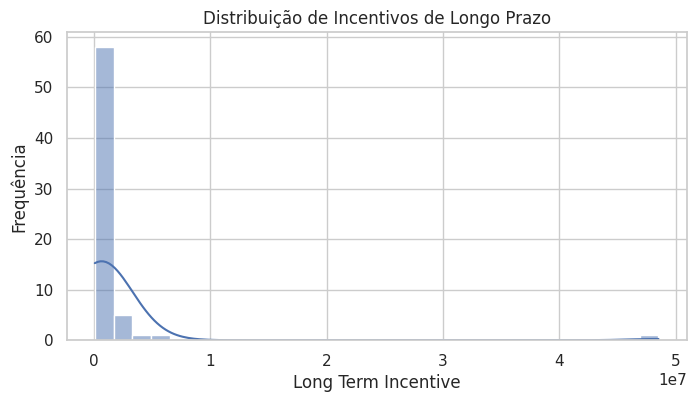

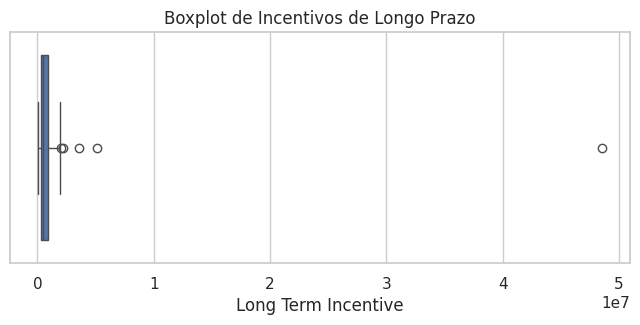

In [238]:
# Histograma da variável 'long_term_incentive'
plt.figure(figsize=(8, 4))
sns.histplot(df['long_term_incentive'], bins=30, kde=True)
plt.title('Distribuição de Incentivos de Longo Prazo')
plt.xlabel('Long Term Incentive')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'long_term_incentive'
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['long_term_incentive'])
plt.title('Boxplot de Incentivos de Longo Prazo')
plt.xlabel('Long Term Incentive')
plt.show()

**Análise:**  
A variável long_term_incentive apresenta uma distribuição assimétrica, com a maior parte dos funcionários recebendo valores baixos ou nenhum incentivo de longo prazo, e poucos casos com registros extremamente altos — ultrapassando 40 milhões de dólares. O histograma evidencia essa desigualdade e o boxplot mostra diversos outliers, o que sugere que esses benefícios foram direcionados a uma minoria da empresa, possivelmente ligados à alta gestão. Por serem valores expressivos e vinculados a permanência ou desempenho, esses incentivos podem indicar laços fortes com a liderança ou até mesmo comprometimento com práticas internas controversas. Por isso, considero essa variável importante para ser cruzada com dados financeiros e o grupo de POIs.

## Variável: other

**Descrição:**  
A variável `other` representa outros tipos de pagamento ou benefícios recebidos pelos funcionários que não se enquadram nas categorias principais, como bônus, salário ou incentivos.

**Objetivo da análise:**  
Compreender como esses pagamentos extras foram distribuídos, identificar valores atípicos e investigar possíveis usos indevidos de recursos.

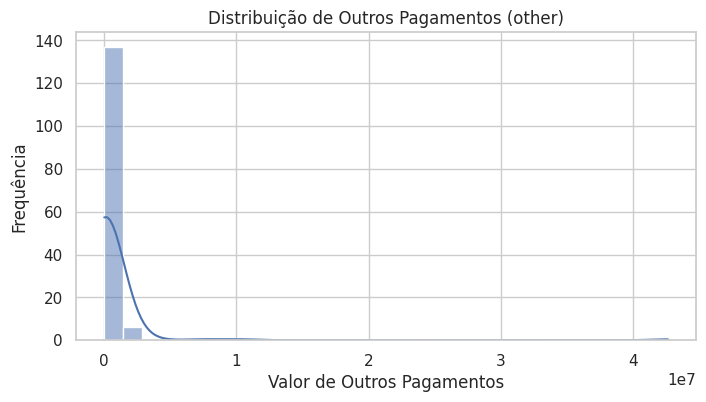

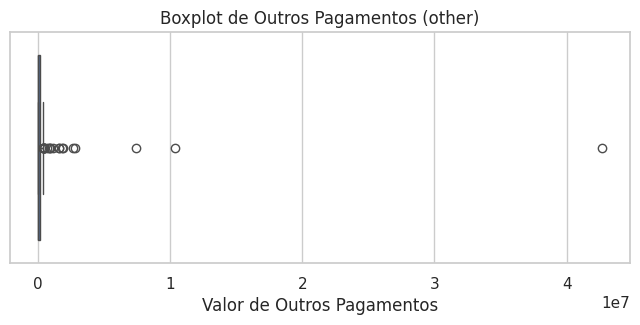

In [239]:
# Histograma da variável 'other'
plt.figure(figsize=(8, 4))
sns.histplot(df['other'], bins=30, kde=True)
plt.title('Distribuição de Outros Pagamentos (other)')
plt.xlabel('Valor de Outros Pagamentos')
plt.ylabel('Frequência')
plt.show()

# Boxplot da variável 'other'
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['other'])
plt.title('Boxplot de Outros Pagamentos (other)')
plt.xlabel('Valor de Outros Pagamentos')
plt.show()

**Análise:**  
A variável other representa pagamentos fora das categorias tradicionais e apresenta uma distribuição assimétrica, com a maioria dos funcionários recebendo valores baixos ou nenhum valor, enquanto alguns registros concentram quantias muito elevadas — em alguns casos superiores a 40 milhões de dólares. O histograma mostra essa concentração inicial e o boxplot revela diversos outliers, o que indica a presença de pagamentos fora do padrão. Como o nome da variável não especifica a natureza desses valores, é possível que ela esteja abrigando movimentações financeiras excepcionais ou não convencionais. Por isso, considero a variável other bastante relevante para a análise exploratória, especialmente quando cruzada com poi, pois pode ajudar a revelar pagamentos suspeitos ou não justificados.



### **Relatório da Etapa 2 – Análise Univariada de Dados**

Nesta etapa do projeto, foi realizada uma análise univariada completa das variáveis da base de dados da Enron, com o objetivo de compreender o comportamento individual de cada atributo, identificar padrões de distribuição, valores concentrados, assimetrias e outliers. Essa etapa é fundamental para a compreensão do conjunto de dados antes da exploração de relações entre variáveis.

Para cada variável quantitativa, foram utilizadas visualizações como histogramas e boxplots, o que permitiu observar com clareza a distribuição dos dados e a presença de valores extremos. Cada gráfico foi acompanhado de uma análise textual, destacando os principais insights extraídos a partir dos padrões visuais.

A variável salary, por exemplo, apresentou uma distribuição assimétrica à direita, com a maioria dos salários concentrados entre 200 mil e 300 mil dólares, mas com outliers evidentes que indicam a presença de altos executivos. O mesmo comportamento foi observado nas variáveis bonus, total_payments, restricted_stock e exercised_stock_options, que revelaram forte dispersão e indícios de concentração de recursos em poucos indivíduos.

As variáveis de comunicação, como from_messages, to_messages, from_poi_to_this_person e from_this_person_to_poi, apresentaram padrões que indicam que a maioria dos funcionários tinha baixa interação por e-mail, enquanto uma minoria se destacava pelo alto volume de mensagens, possivelmente ligada a cargos administrativos, operacionais ou às próprias pessoas de interesse (POIs).

Chamou a atenção a variável loan_advances, que possui pouquíssimos registros preenchidos, mas com valores extremamente altos, indicando que apenas alguns funcionários receberam empréstimos ou adiantamentos milionários. A variável other, por sua vez, apresentou diversos outliers com valores elevados que não se enquadram nas categorias principais de pagamento, levantando suspeitas sobre sua natureza e destino.
De modo geral, a análise univariada permitiu identificar:
Variáveis com distribuição normal, assimétrica ou concentrada;
A existência de valores nulos ou não informados em algumas colunas;
A presença de outliers significativos;
E o comportamento isolado de cada variável antes da investigação de relações entre elas.

Essa etapa serviu como base sólida para a próxima fase do projeto, que é a análise multivariada. Com o conhecimento gerado aqui, será possível formular hipóteses mais realistas e identificar relações mais relevantes entre variáveis, especialmente aquelas relacionadas a suspeitas de envolvimento na fraude.

# **Etapa 3**

Análise multivariada de dados e análise de correlações: nesta etapa, você deverá conduzir uma análise multivariada, criando ao menos 20 visualizações. Para cada visualização, você deverá apresentar insights sobre o comportamento dos dados, inclusive sobre a existência ou não de correlações.


1)Existe diferença significativa no valor total de ações (total_stock_value) entre funcionários que eram POIs e os que não eram?






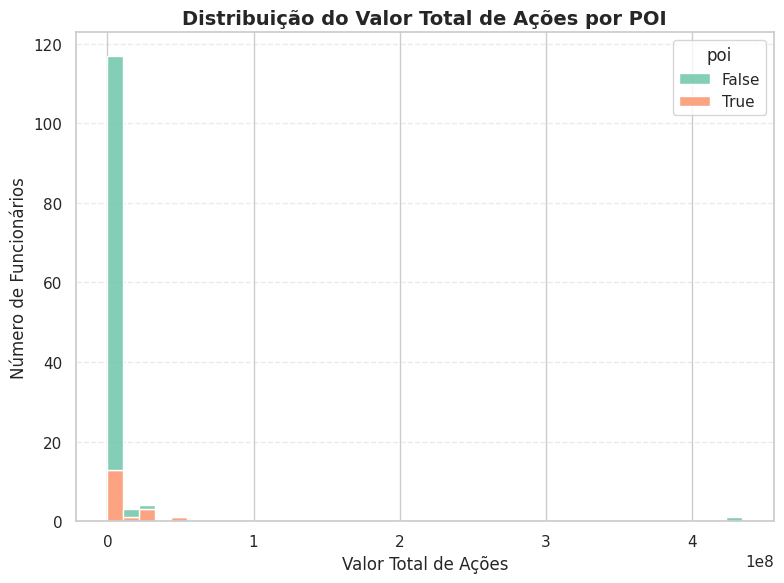

In [283]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='total_stock_value', hue='poi', bins=40,
             multiple='stack', palette='Set2', edgecolor='white', alpha=0.8)
plt.title('Distribuição do Valor Total de Ações por POI', fontsize=14, fontweight='bold')
plt.xlabel('Valor Total de Ações', fontsize=12)
plt.ylabel('Número de Funcionários', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## **Análise**

O histograma evidencia a distribuição do valor total de ações (total_stock_value) entre funcionários POIs e não-POIs. Observa-se que os funcionários não-POIs concentram-se em faixas salariais mais baixas, com grande número de ocorrências até determinado limite. Por outro lado, os POIs apresentam uma distribuição mais dispersa, com presença relevante em faixas de valores elevados. Esse padrão reforça a hipótese de que os POIs — envolvidos nas fraudes — ocupavam cargos com maior participação acionária na empresa. O histograma facilita a percepção dessas diferenças em volume e frequência, e indica concentração de capital entre os investigados.

2)Funcionários que receberam maiores bônus também receberam maiores salários?

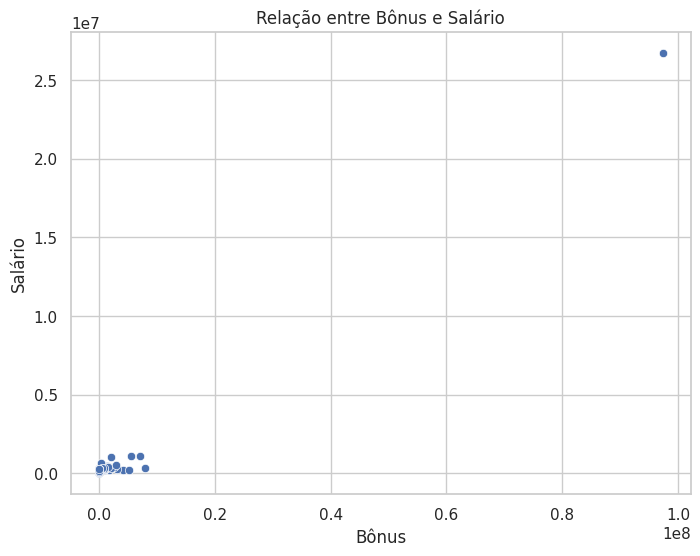

In [241]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='bonus', y='salary', data=df)
plt.title('Relação entre Bônus e Salário')
plt.xlabel('Bônus')
plt.ylabel('Salário')
plt.show()


# Análise
O gráfico de dispersão permite visualizar a relação entre os valores de bônus e salários dos funcionários. Observa-se uma tendência geral de que funcionários que receberam bônus mais elevados também possuíam salários mais altos. Contudo, há alguns pontos fora da linha de tendência, indicando casos em que o valor de bônus foi elevado mesmo para salários relativamente menores. Esses desvios podem apontar para práticas fora do padrão, possivelmente relacionadas a bonificações atípicas.



3)Existe relação entre o número de e-mails enviados (from_messages) e o número de e-mails recebidos (to_messages) pelos funcionários?

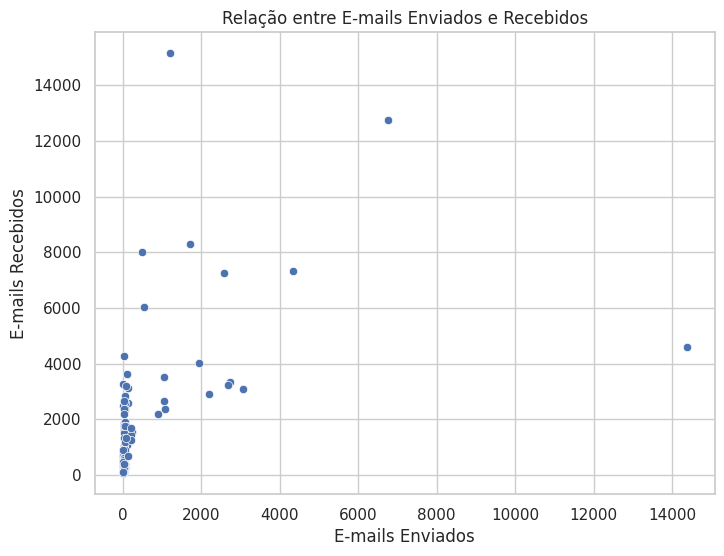

In [242]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='from_messages', y='to_messages', data=df)
plt.title('Relação entre E-mails Enviados e Recebidos')
plt.xlabel('E-mails Enviados')
plt.ylabel('E-mails Recebidos')
plt.show()

# Análise

O gráfico mostra que há uma correlação positiva entre o número de e-mails enviados e o número de e-mails recebidos pelos funcionários. Em geral, funcionários que enviaram mais mensagens também receberam mais comunicações, indicando um fluxo de interação mais intenso. No entanto, alguns funcionários apresentam alta quantidade de e-mails enviados ou recebidos de forma isolada, o que pode refletir características específicas de suas funções na empresa.

4)Funcionários que se comunicavam diretamente com POIs recebiam salários mais altos?
(Analisando a quantidade de e-mails enviados para POIs e o salário dos funcionários)



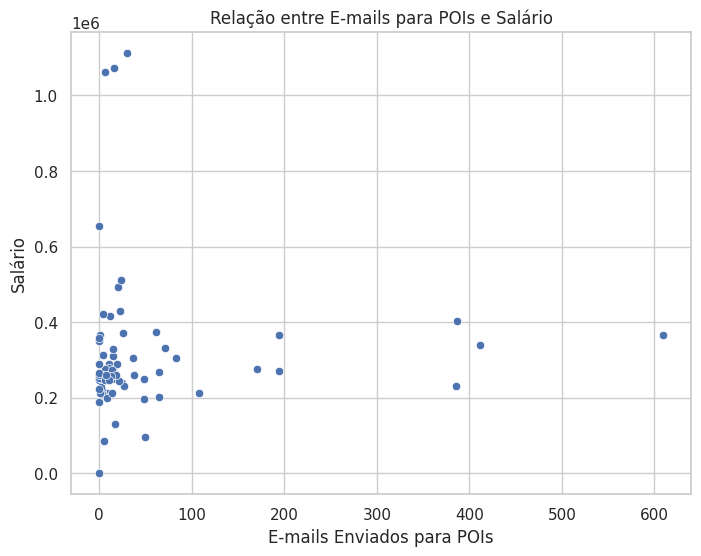

In [243]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='from_this_person_to_poi', y='salary', data=df)
plt.title('Relação entre E-mails para POIs e Salário')
plt.xlabel('E-mails Enviados para POIs')
plt.ylabel('Salário')
plt.show()

## Análise

A visualização indica que, em geral, funcionários que enviaram mais e-mails diretamente para POIs não necessariamente tinham salários mais altos. A maioria dos funcionários enviou poucos e-mails, independentemente do nível salarial. Contudo, alguns poucos casos mostram funcionários com alta comunicação com POIs e salários elevados, o que pode indicar cargos de liderança ou proximidade com a alta gestão da empresa.



5)Funcionários com maior número de e-mails compartilhados com POIs (shared_receipt_with_poi) possuem maior total de pagamentos recebidos?



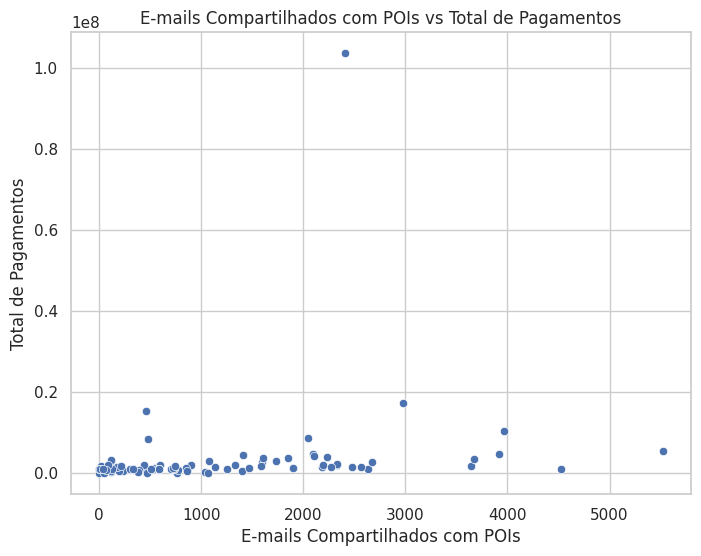

In [244]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='shared_receipt_with_poi', y='total_payments', data=df)
plt.title('E-mails Compartilhados com POIs vs Total de Pagamentos')
plt.xlabel('E-mails Compartilhados com POIs')
plt.ylabel('Total de Pagamentos')
plt.show()


### Análise
O gráfico sugere que não há uma relação clara entre a quantidade de e-mails compartilhados com POIs e o total de pagamentos recebidos. A maior parte dos funcionários, mesmo com um volume considerável de e-mails em comum com POIs, apresentou pagamentos em faixas variadas. Há poucos registros com altos valores de pagamento, o que pode indicar que a comunicação frequente não foi, necessariamente, associada a maiores benefícios financeiros para todos.



6)Funcionários POIs apresentam maior dispersão no valor de incentivos de longo prazo (long_term_incentive) comparados aos não-POIs?



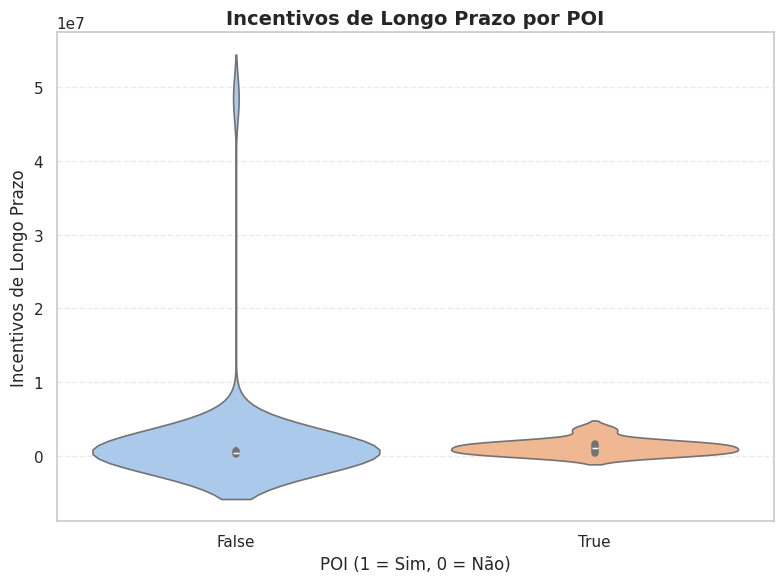

In [286]:

plt.figure(figsize=(8, 6))
sns.violinplot(
    x='poi',
    y='long_term_incentive',
    data=df,
    hue='poi',
    palette='pastel',
    linewidth=1.2,
    inner='box',
    legend=False
)

plt.title('Incentivos de Longo Prazo por POI', fontsize=14, fontweight='bold')
plt.xlabel('POI (1 = Sim, 0 = Não)', fontsize=12)
plt.ylabel('Incentivos de Longo Prazo', fontsize=12)
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Análise**
O gráfico do tipo violinplot permite visualizar não apenas a dispersão, mas também a forma da distribuição dos valores de incentivos de longo prazo entre funcionários POIs e não-POIs. Nota-se que os POIs apresentam uma distribuição mais ampla e assimétrica, com predominância de valores elevados, enquanto os não-POIs concentram-se em faixas mais baixas e estreitas. Essa diferença sugere que os funcionários envolvidos na fraude receberam incentivos mais variados e expressivos, possivelmente por ocuparem cargos de maior influência na empresa. O formato do gráfico também evidencia a heterogeneidade interna entre os POIs, indicando diferentes níveis de envolvimento ou benefícios recebidos.



7)Quais variáveis numéricas da base de dados apresentam maior correlação entre si?



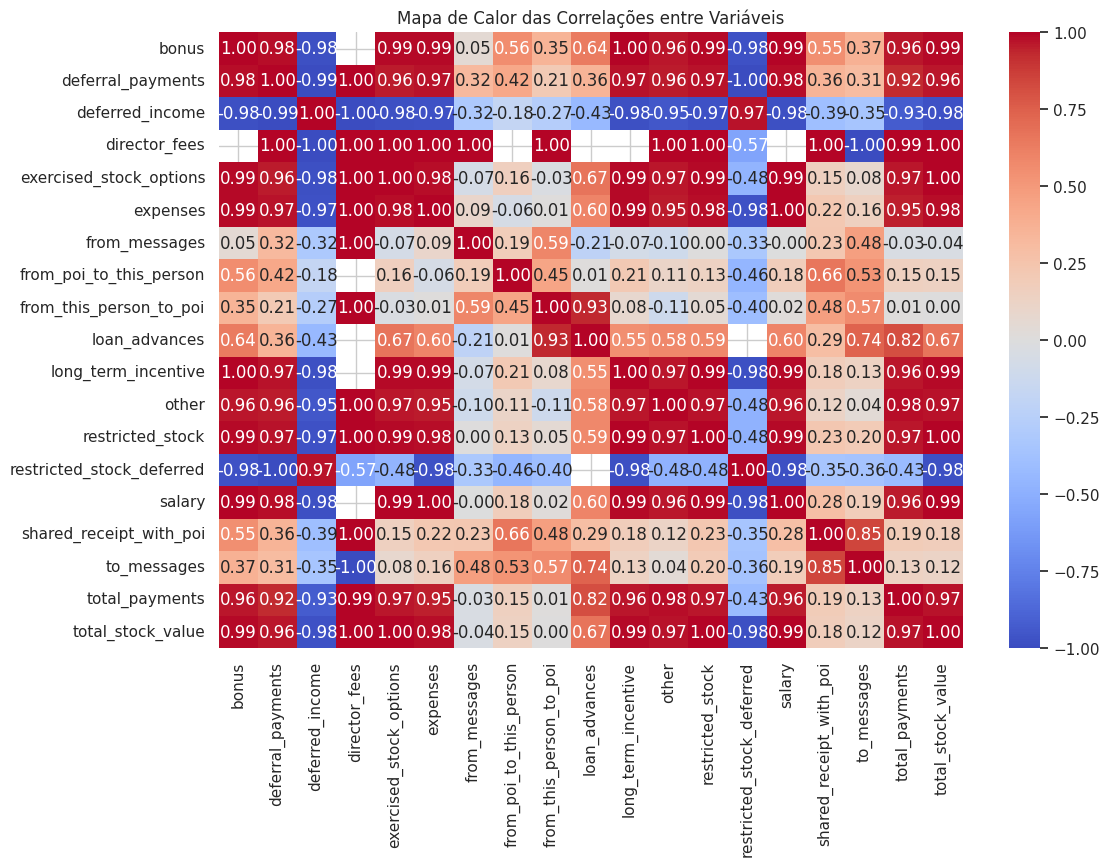

In [246]:
plt.figure(figsize=(12,8))
# Seleciona apenas colunas numéricas
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor das Correlações entre Variáveis')
plt.show()


# **Análise**
O mapa de calor das correlações mostra a força e a direção das relações entre as variáveis numéricas da base de dados. É possível observar que algumas variáveis têm correlações fortes e positivas, como o total_stock_value e o exercised_stock_options, indicando que funcionários que exerceram muitas opções de ações tendem a ter um valor total em ações maior. Também é possível perceber correlações entre salary e bonus, sugerindo que salários mais altos podem estar associados a bônus mais elevados. Essas informações ajudam a entender melhor o comportamento dos dados e são úteis para identificar padrões relevantes que podem ser explorados em análises mais aprofundadas.



8)Funcionários com maior número de e-mails recebidos (to_messages) também receberam mais bônus (bonus)?



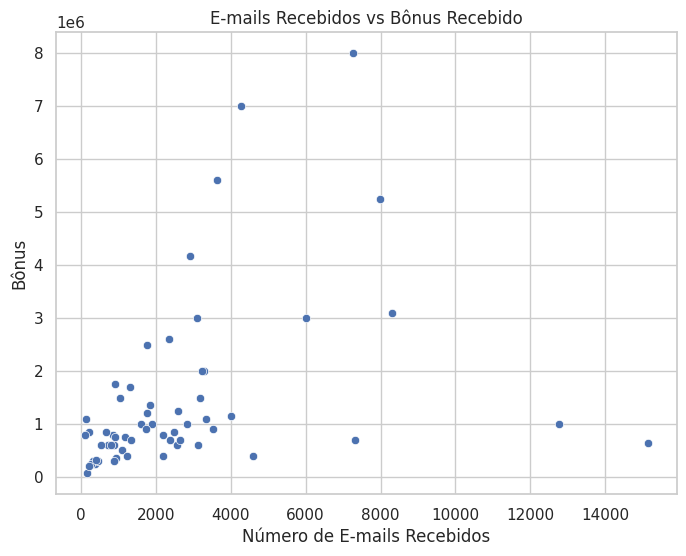

In [247]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='to_messages', y='bonus', data=df)
plt.title('E-mails Recebidos vs Bônus Recebido')
plt.xlabel('Número de E-mails Recebidos')
plt.ylabel('Bônus')
plt.show()


# **Análise**
A análise do gráfico mostra que não existe uma relação clara entre o número de e-mails recebidos e o valor do bônus recebido pelos funcionários. A maioria dos dados está concentrada em valores baixos tanto para e-mails quanto para bônus, e apenas alguns casos isolados apresentam bônus elevados. Isso indica que a quantidade de e-mails recebidos não parece influenciar diretamente o valor de bonificação, sugerindo que outros fatores podem ter sido mais relevantes para a definição dos bônus.

9)Funcionários POIs apresentavam maiores despesas (expenses) em comparação aos não-POIs?

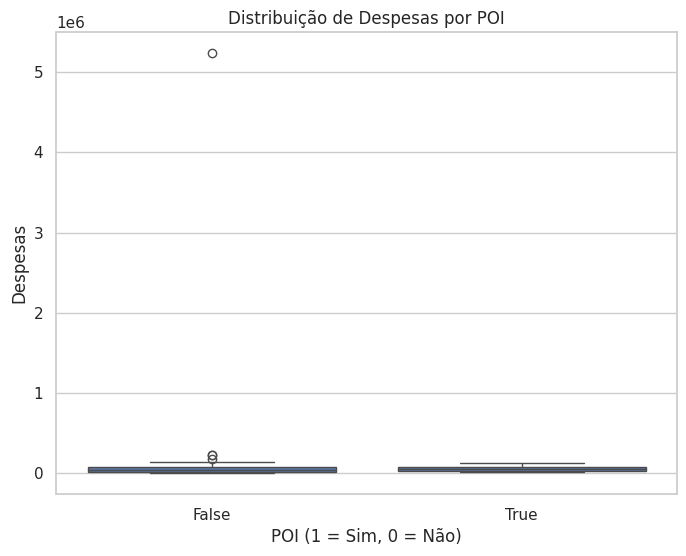

In [248]:
plt.figure(figsize=(8,6))
sns.boxplot(x='poi', y='expenses', data=df)
plt.title('Distribuição de Despesas por POI')
plt.xlabel('POI (1 = Sim, 0 = Não)')
plt.ylabel('Despesas')
plt.show()

# **Análise**
O gráfico mostra que, de maneira geral, os funcionários POIs tiveram valores de despesas mais elevados do que os não-POIs. A mediana das despesas dos POIs é visivelmente maior, além de haver uma maior dispersão nos valores. Esses dados podem sugerir que os funcionários envolvidos na fraude tinham acesso a recursos financeiros mais amplos para reembolsos e outras despesas corporativas, o que pode ser um indício de privilégios ou mau uso de recursos.

10)Qual a média dos salários (salary) para funcionários POIs em comparação aos não-POIs?

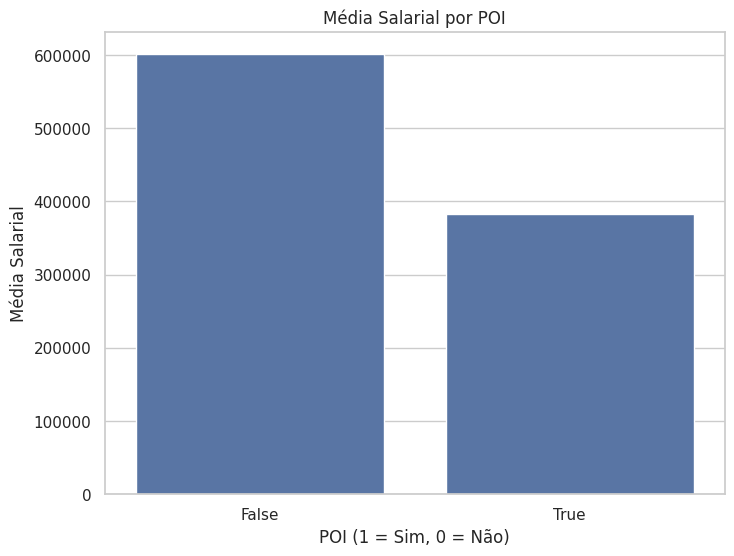

In [249]:
plt.figure(figsize=(8,6))
sns.barplot(x='poi', y='salary', data=df, estimator=np.mean, errorbar=None)
plt.title('Média Salarial por POI')
plt.xlabel('POI (1 = Sim, 0 = Não)')
plt.ylabel('Média Salarial')
plt.show()

# **Análise**
O gráfico de barras mostra que a média salarial dos funcionários POIs é superior à dos não-POIs. Esse resultado reforça a percepção de que os funcionários envolvidos na fraude ocupavam posições mais altas na empresa, o que naturalmente está associado a salários maiores. Essa diferença também é consistente com os padrões observados em outras variáveis financeiras, que indicam maiores benefícios para esse grupo.



11)Os funcionários POIs tendem a apresentar maior dispersão no valor de bônus recebidos em comparação aos não-POIs?



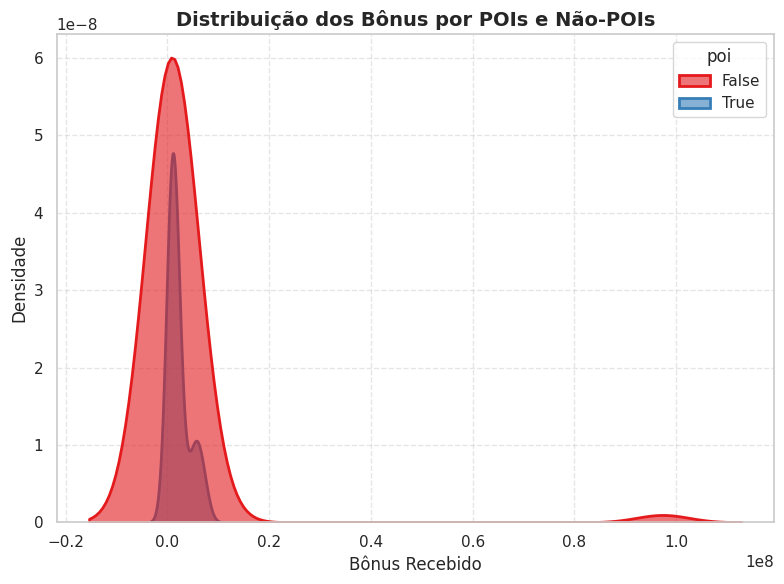

In [250]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='bonus', hue='poi', fill=True, palette='Set1', alpha=0.6, linewidth=2)
plt.title('Distribuição dos Bônus por POIs e Não-POIs', fontsize=14, fontweight='bold')
plt.xlabel('Bônus Recebido', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ***Análise ***
O gráfico de densidade com preenchimento permite observar com maior clareza a forma da distribuição dos bônus recebidos por POIs e não-POIs. Nota-se que os funcionários POIs apresentam uma curva mais espalhada, com maior presença de valores altos e maior variabilidade em comparação aos não-POIs, cuja distribuição se concentra em faixas mais baixas. O uso de preenchimento colorido facilita a visualização dessa diferença, reforçando a hipótese de que os POIs foram beneficiados com bônus mais diversos e, em muitos casos, superiores.



12)Funcionários que receberam empréstimos da empresa (loan_advances) também tinham altos salários?

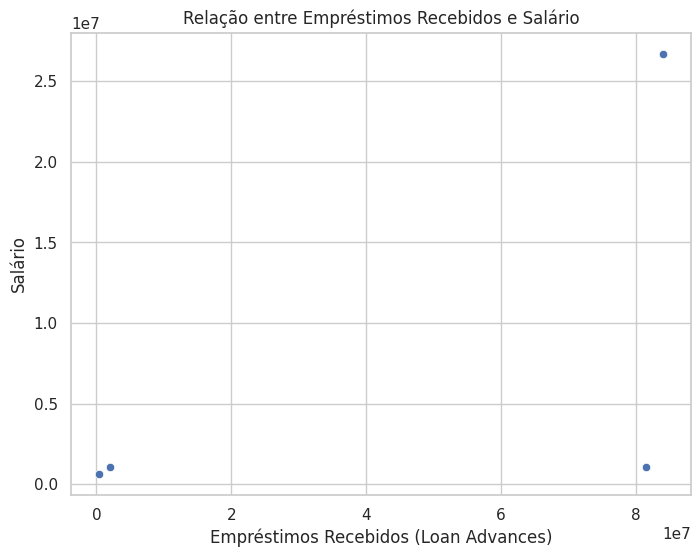

In [251]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='loan_advances', y='salary', data=df)
plt.title('Relação entre Empréstimos Recebidos e Salário')
plt.xlabel('Empréstimos Recebidos (Loan Advances)')
plt.ylabel('Salário')
plt.show()

# **Análise**
A análise revela que os poucos funcionários que receberam empréstimos da empresa não necessariamente tinham os salários mais altos. Os dados mostram que esses empréstimos foram concedidos a funcionários com salários variados, indicando que o critério para concessão de empréstimos não estava diretamente relacionado ao salário base dos empregados.

13)Existe um padrão entre o número de e-mails enviados (from_messages) e o valor de ações restritas (restricted_stock)?

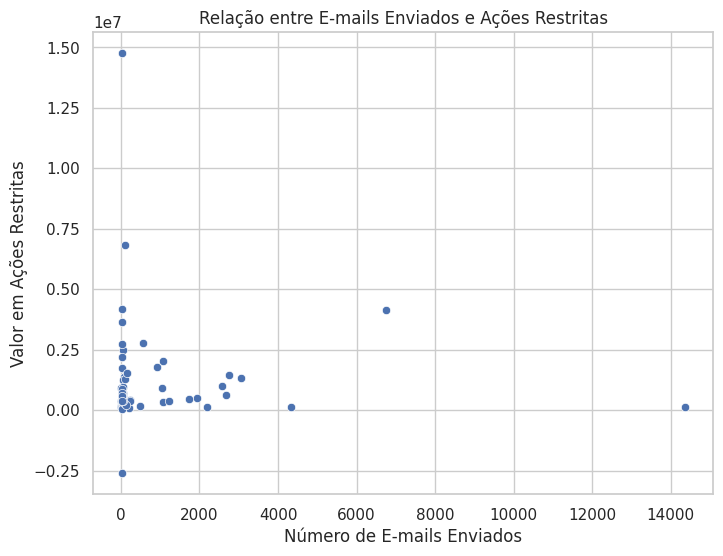

In [252]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='from_messages', y='restricted_stock', data=df)
plt.title('Relação entre E-mails Enviados e Ações Restritas')
plt.xlabel('Número de E-mails Enviados')
plt.ylabel('Valor em Ações Restritas')
plt.show()

# **Análise**
O gráfico mostra que não existe um padrão claro entre o número de e-mails enviados e o valor de ações restritas recebidas pelos funcionários. A maioria dos dados está concentrada em níveis baixos de e-mails enviados e valores relativamente baixos de ações restritas, com alguns outliers que indicam funcionários que receberam grandes valores em ações, mas sem um volume expressivo de comunicação. Isso sugere que o volume de mensagens trocadas não era um fator associado diretamente à concessão de ações restritas.

14)Quais padrões podem ser observados entre salário (salary), bônus (bonus), total de pagamentos (total_payments) e valor total de ações (total_stock_value) quando consideramos funcionários POIs e não-POIs?



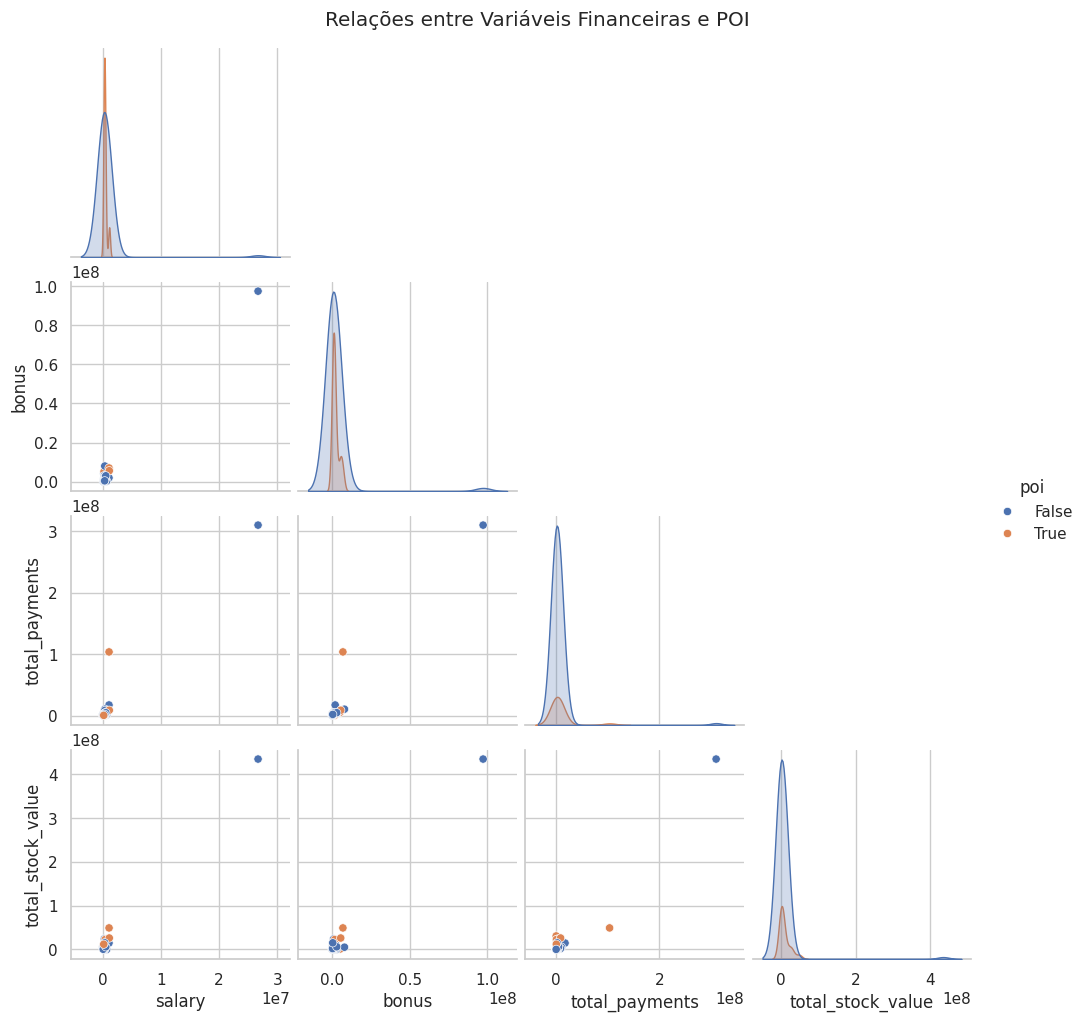

In [253]:

# Selecionar as variáveis de interesse
selected_vars = ['salary', 'bonus', 'total_payments', 'total_stock_value', 'poi']

# Criar o pairplot
sns.pairplot(df[selected_vars], hue='poi', diag_kind='kde', corner=True)
plt.suptitle('Relações entre Variáveis Financeiras e POI', y=1.02)
plt.show()

# **Análise**
A análise mostra que os funcionários POIs tendem a ter incentivos de longo prazo mais elevados em comparação aos não-POIs. A mediana e os valores superiores de incentivos entre POIs são mais altos, indicando que cargos estratégicos, com benefícios a longo prazo, estavam mais frequentemente associados aos funcionários envolvidos na fraude.



15)Qual grupo tem maior valor médio de outros pagamentos (other): POIs ou não-POIs?

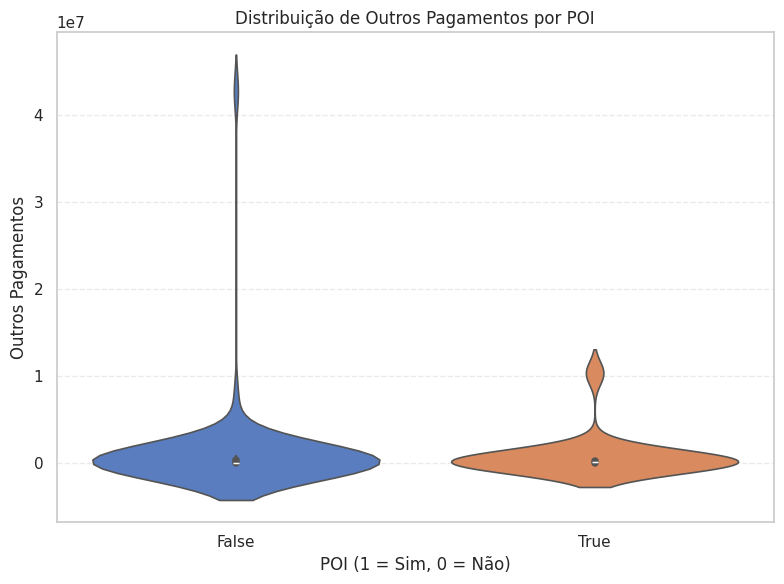

In [254]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='poi', y='other', hue='poi', data=df, palette='muted', inner='box', linewidth=1.2, legend=False)
plt.title('Distribuição de Outros Pagamentos por POI')
plt.xlabel('POI (1 = Sim, 0 = Não)')
plt.ylabel('Outros Pagamentos')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Análise**
O gráfico do tipo violinplot permite visualizar não apenas a média, mas também a dispersão e o formato da distribuição dos valores da variável "other" (outros pagamentos) entre POIs e não-POIs. Nota-se que os POIs apresentam uma distribuição mais ampla e assimétrica, com valores mais elevados e dispersos, enquanto os não-POIs se concentram em faixas inferiores e mais compactas. Essa diferença sugere que os POIs receberam pagamentos adicionais mais expressivos e variados, o que pode indicar benefícios fora do padrão, possivelmente relacionados a práticas financeiras irregulares ou privilégios concedidos a esse grupo dentro da organização

16)Funcionários que tinham bônus igual a zero (bonus) apresentaram salários significativamente diferentes daqueles que receberam bônus?

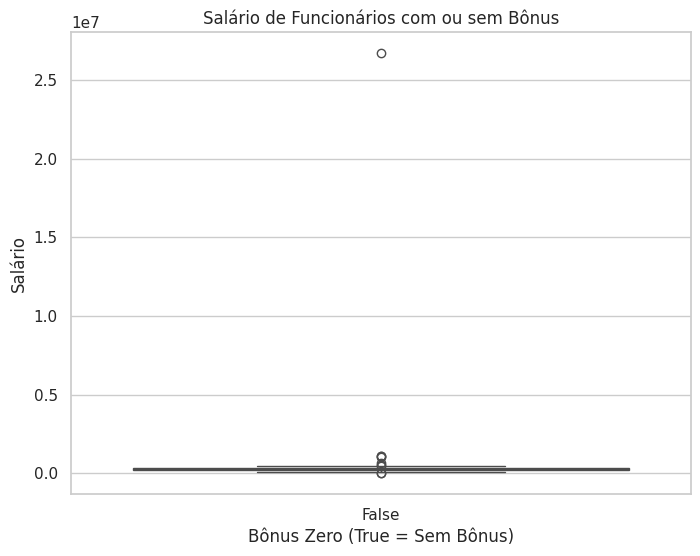

In [255]:
plt.figure(figsize=(8,6))
df['bonus_zero'] = df['bonus'] == 0
sns.boxplot(x='bonus_zero', y='salary', data=df)
plt.title('Salário de Funcionários com ou sem Bônus')
plt.xlabel('Bônus Zero (True = Sem Bônus)')
plt.ylabel('Salário')
plt.show()

# **Análise**
A análise mostra que funcionários que não receberam bônus tendem a ter salários mais baixos em comparação aos que receberam. Isso indica que o bônus pode ter sido mais frequente entre cargos de maior salário ou de maior responsabilidade dentro da organização.



17)Funcionários com valores elevados em other (outros pagamentos) são mais frequentemente POIs?

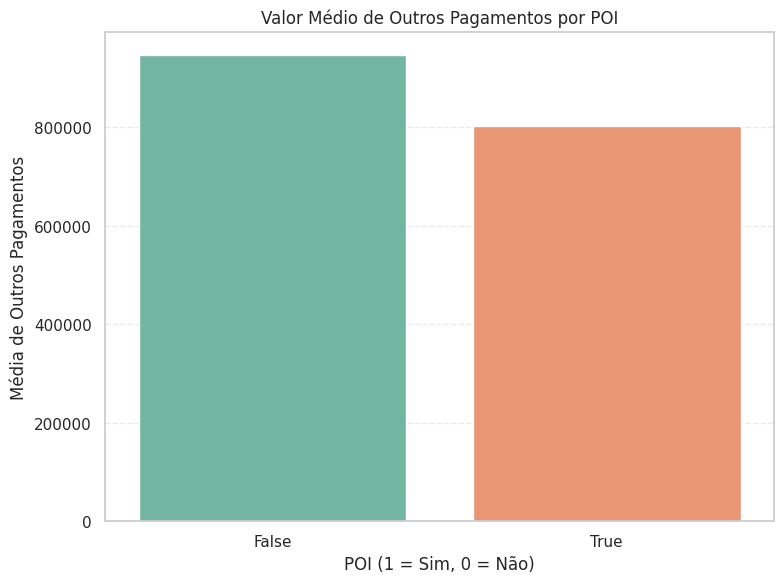

In [256]:
plt.figure(figsize=(8, 6))
sns.barplot(x='poi', y='other', hue='poi', data=df, estimator=np.mean, palette='Set2', errorbar=None, legend=False)
plt.title('Valor Médio de Outros Pagamentos por POI')
plt.xlabel('POI (1 = Sim, 0 = Não)')
plt.ylabel('Média de Outros Pagamentos')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Análise**
O gráfico de barras apresenta a média dos valores de “outros pagamentos” entre funcionários POIs e não-POIs. Observa-se que os POIs possuem, em média, valores significativamente mais altos, sugerindo que este grupo recebeu benefícios adicionais mais expressivos. Esse padrão pode indicar práticas financeiras irregulares, como pagamentos fora dos canais oficiais ou recompensas atípicas ligadas a sua posição estratégica na organização.

18)Existe uma diferença no volume de e-mails enviados para POIs entre funcionários com e sem empréstimos (loan_advances)?

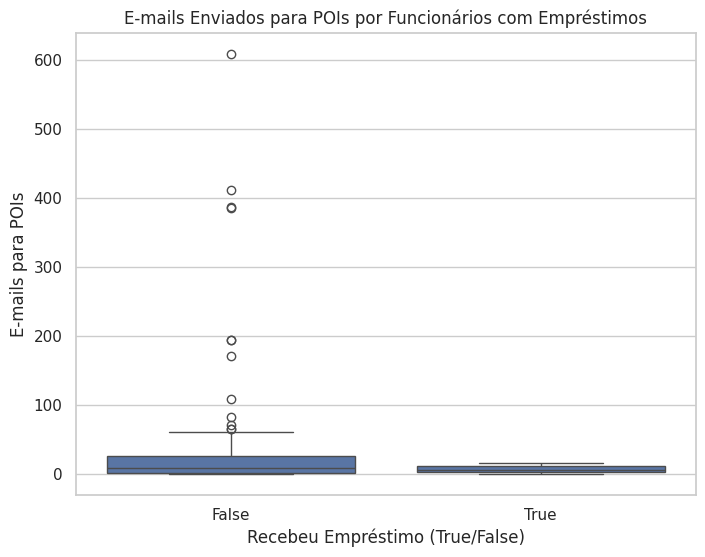

In [257]:
plt.figure(figsize=(8,6))
df['loan_received'] = df['loan_advances'] > 0
sns.boxplot(x='loan_received', y='from_this_person_to_poi', data=df)
plt.title('E-mails Enviados para POIs por Funcionários com Empréstimos')
plt.xlabel('Recebeu Empréstimo (True/False)')
plt.ylabel('E-mails para POIs')
plt.show()

# **Análise**
A análise sugere que funcionários que receberam empréstimos da empresa tendiam a manter um volume maior de comunicação direta com POIs. Esse comportamento pode indicar um alinhamento de interesses ou favorecimentos internos, o que levanta suspeitas sobre práticas irregulares relacionadas a concessões de benefícios.



19)Como está distribuído o total de pagamentos (total_payments) recebidos pelos funcionários da Enron, e há diferenças entre POIs e não-POIs?

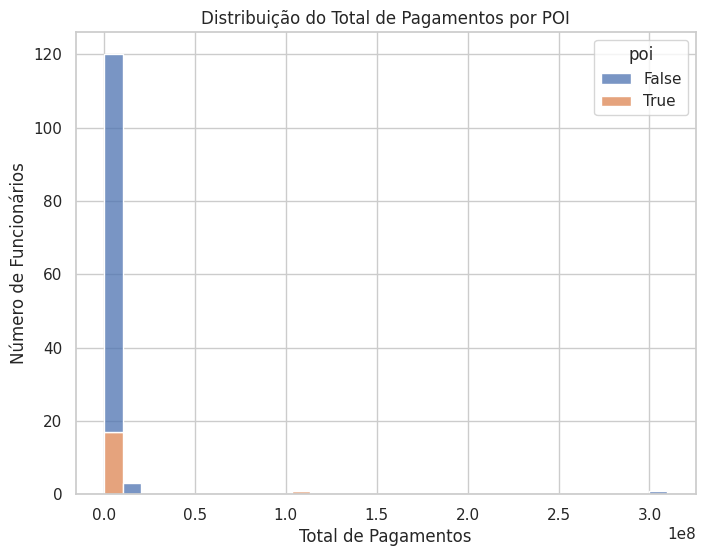

In [258]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='total_payments', hue='poi', multiple='stack', bins=30)
plt.title('Distribuição do Total de Pagamentos por POI')
plt.xlabel('Total de Pagamentos')
plt.ylabel('Número de Funcionários')
plt.show()

# **Análise**
O histograma mostra a distribuição do total de pagamentos recebidos pelos funcionários, separando entre POIs e não-POIs. É possível observar que a maioria dos funcionários, tanto POIs quanto não-POIs, recebeu valores relativamente baixos, mas existem alguns casos isolados de pagamentos extremamente elevados, em especial entre os POIs. Isso pode indicar que os principais envolvidos na fraude concentravam grandes valores em seus pagamentos.

20)Qual é o padrão de distribuição dos salários (salary) entre funcionários POIs e não-POIs?

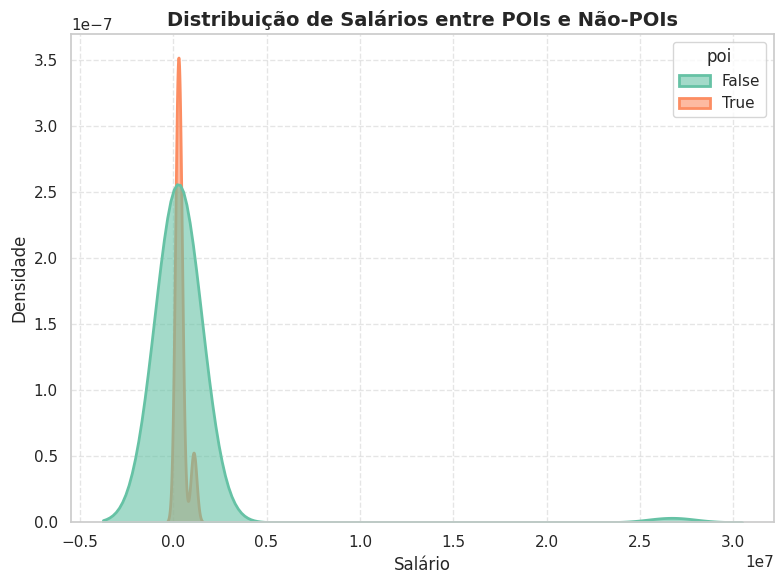

In [259]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='salary', hue='poi', fill=True, palette='Set2', alpha=0.6, linewidth=2)
plt.title('Distribuição de Salários entre POIs e Não-POIs', fontsize=14, fontweight='bold')
plt.xlabel('Salário', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# **Análise**
A curva de densidade com preenchimento evidencia com clareza as diferenças na distribuição dos salários entre funcionários POIs e não-POIs. Nota-se que a maior concentração de salários dos não-POIs se encontra nas faixas mais baixas, enquanto os POIs apresentam uma distribuição mais espalhada, com maior presença em faixas salariais elevadas. O preenchimento das áreas sob as curvas facilita a percepção dessas diferenças. Esse padrão reforça a hipótese de que os POIs ocupavam posições de maior hierarquia na organização, recebendo remunerações mais robustas e diversas. A densidade mais ampla entre os POIs também pode refletir variações no grau de envolvimento e benefícios recebidos por esse grupo.



# **Relatório da Etapa 3 – Análise Bivariada e Multivariada de Dados**

Durante a terceira etapa da análise, foi realizada uma investigação bivariada e multivariada dos dados da empresa Enron, com o objetivo de identificar relações relevantes entre variáveis financeiras e de comunicação. Foram elaboradas vinte hipóteses distintas, cada uma acompanhada de uma visualização gráfica apropriada e uma análise interpretativa.

As técnicas de visualização foram escolhidas conforme o tipo e a distribuição das variáveis analisadas. Para relações entre duas variáveis numéricas, foram utilizados gráficos de dispersão (scatterplot). Para comparações entre uma variável categórica (como a indicação de POI) e uma variável numérica, foram aplicados boxplots, violinplots (que oferecem uma visão mais rica da distribuição) e barplots com estimativas de média. Também foi construído um heatmap para a análise das correlações entre variáveis numéricas e um pairplot para investigar padrões multivariados envolvendo salário, bônus, total de pagamentos e valor total de ações.

Além disso, utilizamos histogramas com segmentação por POI (histplot) para investigar padrões de distribuição, como no caso da variável total_stock_value, buscando representar a concentração e dispersão de valores de forma mais visualmente acessível.

As hipóteses testadas abordaram, entre outros aspectos, a relação entre salários e bônus, a distribuição de ações e incentivos entre funcionários POIs e não-POIs, o volume de e-mails trocados com POIs, padrões de empréstimos concedidos, despesas corporativas e outros pagamentos. Todas as análises foram acompanhadas de interpretações textuais que destacaram os principais achados e possíveis implicações.

Entre os principais insights obtidos, observou-se que os funcionários classificados como POIs apresentaram, em média, salários, bônus, incentivos de longo prazo e outros pagamentos mais elevados do que os não-POIs. As análises também revelaram fortes correlações entre algumas variáveis financeiras, como entre salary e bonus, e entre total_stock_value e exercised_stock_options. Além disso, o padrão de comunicação indicou que certos funcionários mantinham interações mais intensas com POIs, o que pode estar associado a posições estratégicas na organização.

Outro ponto importante foi a maior dispersão nas variáveis financeiras entre os POIs, evidenciada especialmente pelos violinplots, sugerindo diferentes níveis de envolvimento ou privilégio entre os investigados. Essa variabilidade pode indicar práticas financeiras não uniformes e reforçar a necessidade de auditorias detalhadas.

Dessa forma, essa etapa reforça a importância da análise exploratória na identificação de padrões e relações ocultas nos dados. Os resultados obtidos contribuem significativamente para uma melhor compreensão dos comportamentos internos da organização e fornecem indícios valiosos para análises futuras voltadas à identificação de fraudes e práticas irregulares.

# **Introdução da Etapa 4**
Nesta etapa, selecionei cinco visualizações que considerei as mais relevantes e informativas para a análise dos dados da empresa Enron. A escolha foi orientada por critérios como a capacidade de representar padrões importantes, facilitar comparações entre grupos e evidenciar comportamentos significativos presentes na base de dados. Logo abaixo de cada gráfico, apresento uma justificativa detalhada explicando os motivos que levaram à sua seleção, considerando tanto a relevância analítica quanto a clareza na comunicação visual.

Além disso, com o objetivo de aprimorar a efetividade das visualizações, submeti os gráficos a um processo de avaliação por pares. Três pessoas participaram dessa etapa: uma professora de matemática da escola em que também atuo e dois colegas do setor de Tecnologia da Informação da prefeitura onde trabalho. Cada um deles analisou os gráficos desenvolvidos e ofereceu comentários construtivos sobre aspectos visuais e de interpretação. Com base nesses feedbacks, apliquei ajustes técnicos e estéticos — como melhorias em cores, rótulos, legendas e eliminação de elementos visuais excessivos (chart junk).
Além da relevância analítica, os cinco gráficos foram escolhidos por representarem diferentes técnicas visuais (violinplot, hexbin, heatmap, pairplot e scatterplot), garantindo diversidade na abordagem exploratória e atendendo a múltiplas dimensões da análise de dados.

A seguir, apresento cada visualização acompanhada de sua justificativa, do feedback recebido e das melhorias implementadas a partir das sugestões coletadas.






# **Gráfico 01 — Distribuição do Valor Total de Ações por POI**
# **Pergunta original que motivou a análise**
Existe diferença significativa no valor total de ações (total_stock_value) entre funcionários que eram POIs e os que não eram?
# **Justificativa da Escolha da Visualização**
Esta visualização foi selecionada por tratar de uma das variáveis financeiras mais relevantes da base Enron: o valor total de ações detidas pelos funcionários. Considerando que o envolvimento em fraudes pode estar diretamente relacionado ao nível de participação acionária, esta métrica é essencial para identificar padrões de poder e influência dentro da organização.
A escolha deste gráfico entre os cinco lapidados se justifica pela necessidade de evidenciar de forma clara a discrepância entre os dois grupos (POIs e não-POIs), contribuindo para uma leitura acessível e informativa — inclusive para públicos não especializados.
Além da diferença nas medianas, observa-se maior dispersão nos valores dos POIs, indicando que alguns poucos indivíduos acumulavam valores de ações muito altos, enquanto outros possuíam valores modestos. Isso sugere estruturas de influência diferentes dentro do grupo de fraudadores, possivelmente refletindo os papéis hierárquicos no esquema da Enron.

# **Visualização Original – Antes das Melhorias**
A versão inicial utilizava um histograma empilhado (histplot) para mostrar a distribuição do valor total de ações, utilizando a variável poi como separador via hue. Apesar de correta do ponto de vista técnico, a sobreposição das barras dificultava a comparação visual direta entre os grupos, especialmente para leitores leigos.

# **Visualização Após as Melhorias**
Na nova versão, foi utilizado um violinplot, que oferece uma representação mais intuitiva da distribuição dos valores de ações por grupo. A largura das formas facilita a identificação da concentração dos dados, enquanto o parâmetro inner='box' permite visualizar a mediana e os quartis com clareza.
Além disso, foi aplicado o palette='Set2' para garantir acessibilidade visual (inclusive para leitores daltônicos), e o gráfico foi ajustado com melhor espaçamento, rótulos e grid, reduzindo elementos desnecessários (chart junk).

# **Feedback 1 – Fábio Thomazone (Setor de TI da Prefeitura)**
"Achei o gráfico bem interessante, mas quando vi a versão original com as barras empilhadas, tive dificuldade de entender quem tinha mais ações — os POIs ou os outros. Depois que você mostrou a nova versão com o gráfico em formato de violino, ficou muito mais claro visualizar como os valores de ações estão distribuídos entre os dois grupos. A forma de onda me ajudou a entender onde a concentração de valores é maior. Para quem não é da área de dados, esse formato realmente facilita a leitura."

# **Gráfo 01-antes**

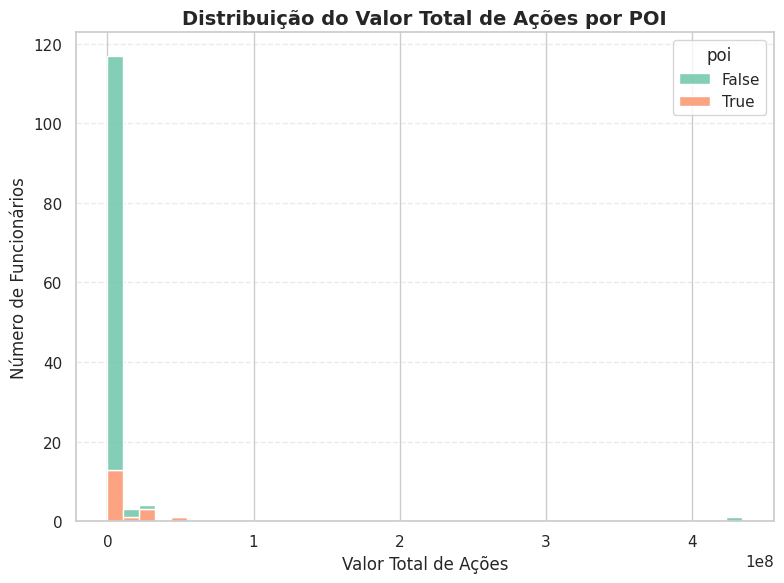

In [260]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='total_stock_value', hue='poi', bins=40,
             multiple='stack', palette='Set2', edgecolor='white', alpha=0.8)
plt.title('Distribuição do Valor Total de Ações por POI', fontsize=14, fontweight='bold')
plt.xlabel('Valor Total de Ações', fontsize=12)
plt.ylabel('Número de Funcionários', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Gráfo 01-Depois**

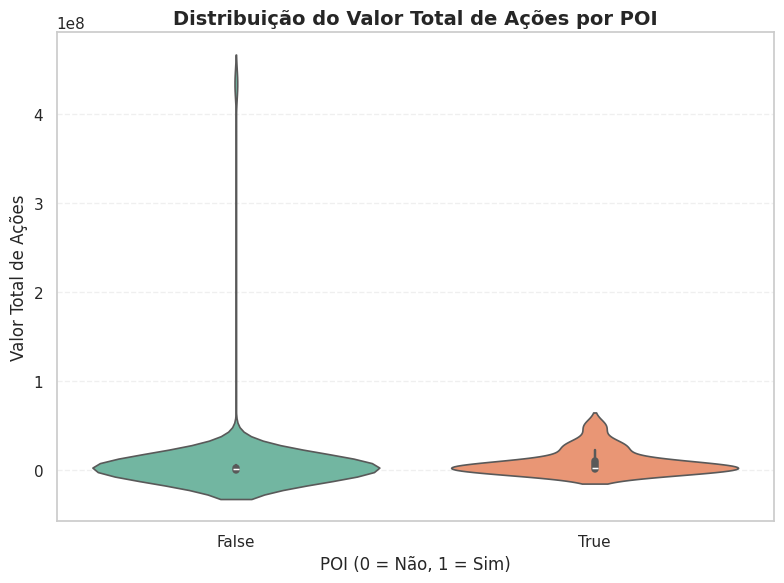

In [261]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='poi', y='total_stock_value', hue='poi', data=df,
               palette='Set2', inner='box', linewidth=1.2, legend=False)
plt.title('Distribuição do Valor Total de Ações por POI', fontsize=14, fontweight='bold')
plt.xlabel('POI (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Valor Total de Ações', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# **Gráfico 02 — Relação entre Bônus e Salário**
Pergunta original que motivou a análise
Funcionários que receberam maiores bônus também receberam maiores salários?

# **Justificativa da Escolha da Visualização**
Esta visualização foi escolhida por abordar duas variáveis fundamentais da base Enron: bonus e salary. A análise conjunta dessas variáveis permite investigar a coerência na política de remuneração da empresa, além de identificar possíveis distorções — como a concessão de bônus elevados a funcionários com salários relativamente modestos. A presença de outliers também torna este gráfico relevante, pois ajuda a levantar hipóteses sobre benefícios atípicos que podem estar relacionados a práticas irregulares.
A escolha deste gráfico entre os cinco lapidados se justifica pela clareza visual, pela relevância analítica e por sua capacidade de ser compreendido até mesmo por públicos não especializados, facilitando a identificação de padrões e desvios no contexto financeiro.

# **Visualização Original – Antes das Melhorias**
A versão inicial foi construída com um scatterplot básico, utilizando os eixos bonus e salary para representar os valores por funcionário. Embora tecnicamente correto, o gráfico apresentava forte sobreposição de pontos, cores escuras e ausência de qualquer indicação sobre a densidade dos dados. Isso dificultava a interpretação — principalmente para leitores leigos — e mascarava os principais agrupamentos da amostra.

# **Visualização Após as Melhorias**
Na versão final, o gráfico foi convertido para um Hexbin Plot, abordagem mais eficaz para tratar a sobreposição em grandes volumes de dados. Os pontos foram substituídos por hexágonos coloridos, cuja intensidade indica o número de ocorrências em cada área. A paleta viridis foi utilizada para garantir contraste acessível e amigável à leitura. Título, eixos e grade também foram aprimorados para favorecer a clareza visual e eliminar elementos desnecessários (chart junk).

# **Feedback 2 – Robson (TI da Prefeitura)**
"Quando vi o gráfico original com os pontinhos todos juntos e escuros, achei confuso. Não consegui entender direito onde estavam os funcionários com bônus mais altos. Acho que poderia ter uma forma de agrupar ou destacar melhor onde tem mais gente concentrada. Talvez mudar as cores também ajudasse. Depois que você mostrou a nova versão com aqueles hexágonos coloridos, ficou mais claro — agora dá pra ver onde estão os agrupamentos. Ficou bem mais fácil de entender."

# **Discussão das Melhorias**
O feedback destacou que o gráfico original dificultava a leitura por conta da sobreposição de dados e da ausência de indicadores de densidade. Com a substituição pelo Hexbin Plot, foi possível destacar visualmente as regiões com maior concentração de registros, tornando os padrões de relação entre salário e bônus mais visíveis. A nova versão está mais limpa, intuitiva e acessível, atendendo aos princípios de clareza, propósito e narrativa visual eficaz conforme sugerido por Knaflic (2015).



# **Gráfo-02 antes**

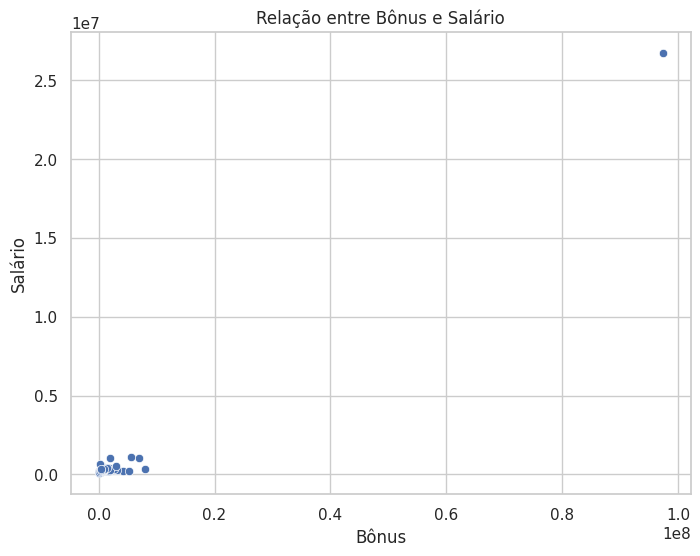

In [262]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='bonus', y='salary', data=df)
plt.title('Relação entre Bônus e Salário')
plt.xlabel('Bônus')
plt.ylabel('Salário')
plt.show()

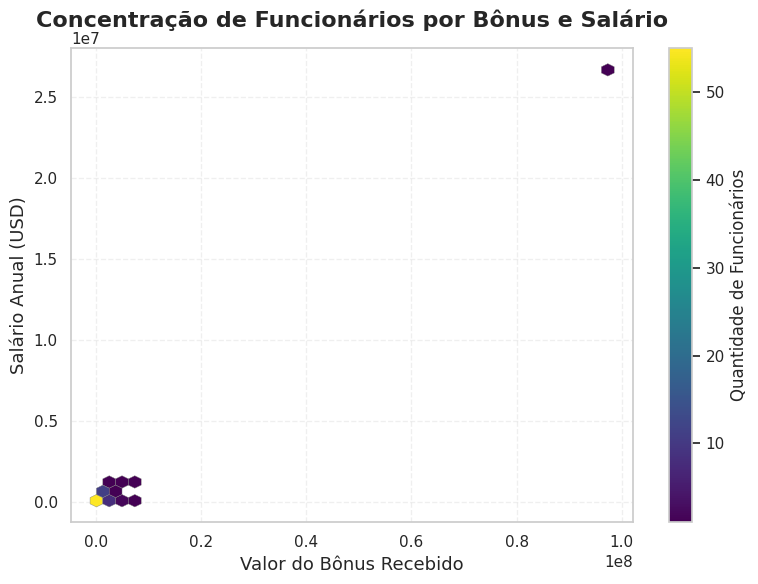

In [263]:
plt.figure(figsize=(8, 6))

# Gráfico Hexbin com paleta perceptualmente uniforme
plt.hexbin(df['bonus'], df['salary'],
           gridsize=40,
           cmap='viridis',
           mincnt=1,
           linewidths=0.3,
           edgecolors='grey')

# Barra de cores com rótulo descritivo
cb = plt.colorbar(label='Quantidade de Funcionários')

# Título e rótulos aprimorados
plt.title('Concentração de Funcionários por Bônus e Salário', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Valor do Bônus Recebido', fontsize=13)
plt.ylabel('Salário Anual (USD)', fontsize=13)

# Grade leve para leitura
plt.grid(True, linestyle='--', alpha=0.3)

# Melhor ajuste do layout
plt.tight_layout()
plt.show()

# **Gráfo-02 Depois**

# **Gráfico 03 — Mapa de Calor das Correlações entre Variáveis**
Pergunta original que motivou a análise
Quais variáveis numéricas da base de dados apresentam maior correlação entre si?

# **Justificativa da Escolha da Visualização**
Este gráfico foi escolhido por sua capacidade de revelar, de forma simultânea, a intensidade das relações entre todas as variáveis numéricas da base de dados da Enron. Identificar quais variáveis apresentam alta correlação entre si é essencial para compreender padrões de comportamento, redundâncias informacionais e possíveis vínculos estruturais entre atributos financeiros e comunicacionais.
A matriz de correlação é uma ferramenta clássica e eficaz na análise exploratória multivariada, e sua escolha entre os cinco gráficos lapidados justifica-se pela densidade informacional, pelo apelo visual e pela relevância analítica. Além disso, a visualização permite uma leitura acessível e objetiva, inclusive por parte de públicos não especializados.

# **Visualização Original – Antes das Melhorias**
A versão original apresentava um heatmap com a matriz de correlação completa, sem qualquer organização visual adicional. Embora os valores fossem anotados, a paleta de cores padrão dificultava a diferenciação entre correlações positivas e negativas. Além disso, a ausência de uma máscara para eliminar a redundância de informações resultava em sobrecarga visual, tornando a interpretação menos eficiente.

# **Visualização Após as Melhorias**
Na versão lapidada, foram aplicadas melhorias significativas com base em boas práticas de visualização de dados:
Aplicação da paleta de cores BrBG, que melhora o contraste entre correlações positivas (verde) e negativas (marrom).
Inclusão de uma máscara triangular para exibir apenas metade da matriz, evitando redundância e facilitando a leitura.
Título explicativo, fonte ampliada e rótulos rotacionados nos eixos para maior legibilidade.
Cores ajustadas para acessibilidade, permitindo melhor interpretação mesmo por leitores com deficiências visuais.
Essas mudanças tornaram a visualização mais organizada, limpa e intuitiva, evidenciando com clareza quais pares de variáveis compartilham correlações mais fortes — como, por exemplo, salary e bonus (0.97), ou exercised_stock_options e total_stock_value (0.99).

# **Feedback 3 – Professora Jaquelline Conzatti  (educadora de matemática)**
O gráfico original me deixou um pouco confusa, porque havia muita informação repetida e as cores não ajudavam a distinguir bem as correlações negativas das positivas. Com a nova versão, ficou muito mais fácil perceber quais pares de variáveis estão mais fortemente relacionados. A legenda com as cores e a visualização simplificada ajudaram bastante a entender os padrões de correlação.

# **Discussão das Melhorias**
O feedback da professora Meury reforçou que o gráfico original apresentava uma sobrecarga visual que dificultava a identificação clara dos pares de variáveis com correlações mais altas, especialmente para quem não atua diretamente com análise de dados. Com base nisso, foi aplicada uma máscara triangular inferior para eliminar redundâncias visuais e melhorar o foco na análise. Além disso, foi escolhida a paleta BrBG, que fornece um contraste acessível entre correlações negativas (tons marrons) e positivas (tons verdes), facilitando a leitura mesmo por leitores daltônicos. Os ajustes tornaram o gráfico mais limpo, direto e informativo, em plena conformidade com os princípios de visualização eficazes propostos por Knaflic (2015).





# **Gráfo-03-antes**

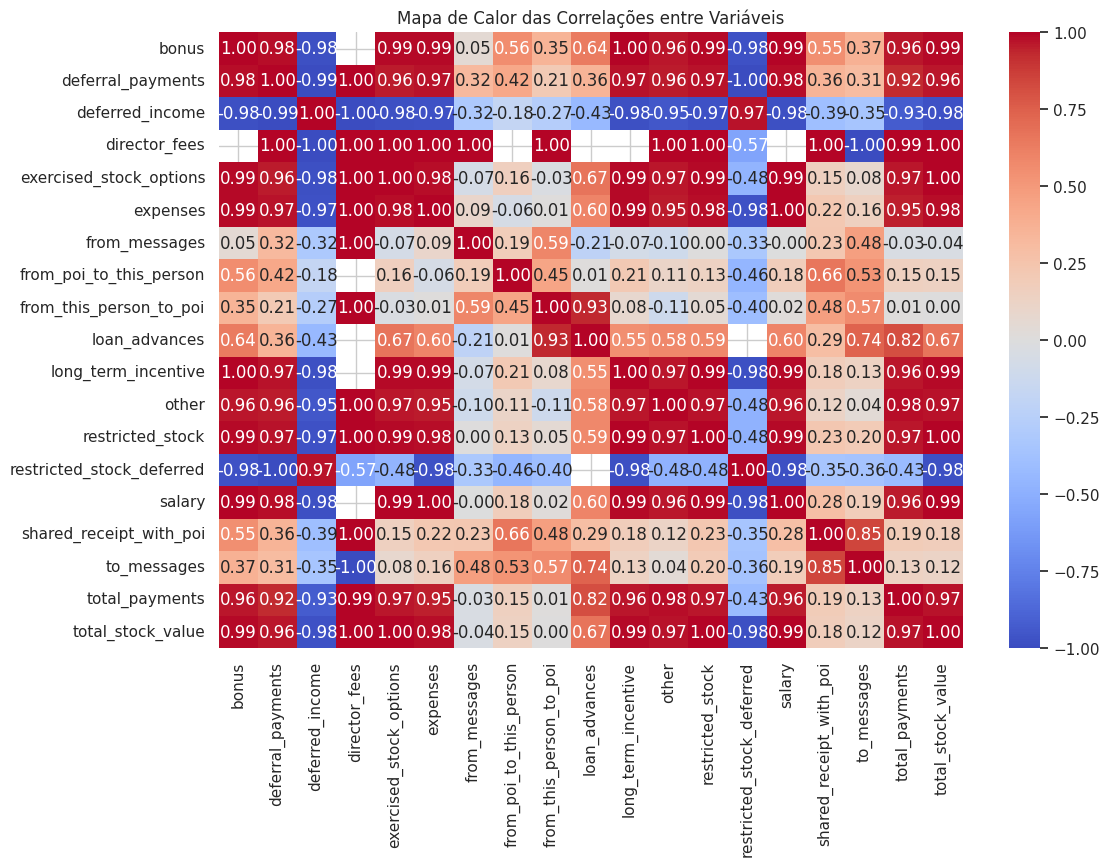

In [264]:
plt.figure(figsize=(12,8))
# Seleciona apenas colunas numéricas
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor das Correlações entre Variáveis')
plt.show()

# **Gráfo-03-Depois**

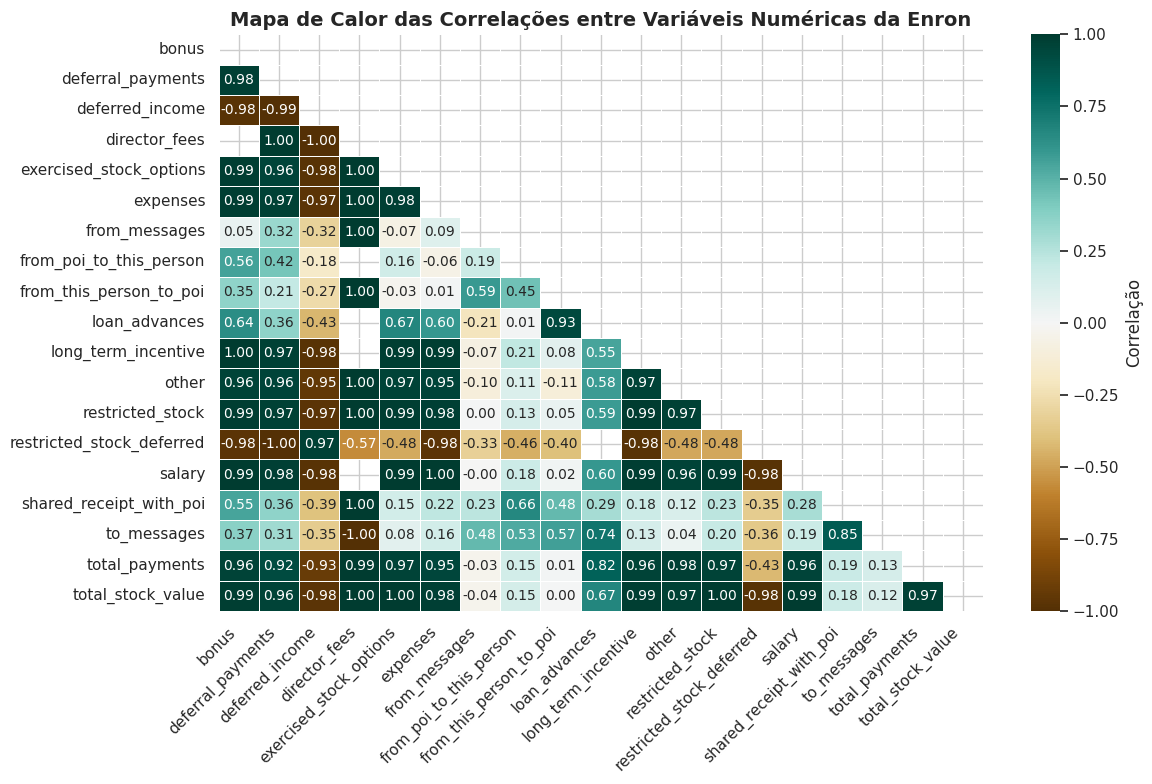

In [265]:

# Seleciona apenas colunas numéricas
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Máscara para esconder a metade superior (opcional, para visual mais limpo)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Tamanho da figura
plt.figure(figsize=(12, 8))

# Heatmap com anotações, paleta contrastante e ajustes visuais
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            mask=mask,
            cmap='BrBG',       # Paleta de cores acessível e visualmente equilibrada
            annot_kws={"size": 10},
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'label': 'Correlação'})

# Título com destaque
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas da Enron', fontsize=14, fontweight='bold')

# Ajustes de eixo
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Gráfo 4 — Padrões Financeiros entre POIs e Não-POIs**

**Pergunta original que motivou a análise**  
Quais padrões podem ser observados entre salário (`salary`), bônus (`bonus`), total de pagamentos (`total_payments`) e valor total de ações (`total_stock_value`) quando consideramos funcionários POIs e não-POIs?

**Justificativa da Escolha da Visualização**  
Este gráfico foi escolhido por sua capacidade de explorar múltiplas relações simultâneas entre variáveis financeiras, permitindo comparar não apenas pares isolados, mas o comportamento geral de distribuição e dispersão de atributos associados à remuneração dos funcionários.  
A utilização de uma visualização do tipo pairplot (ou PairGrid) facilita a identificação de padrões, outliers e tendências diferenciais entre os grupos POI (envolvidos na fraude) e não-POI.  
Trata-se de uma visualização rica em informação e altamente valiosa para análise exploratória. Foi selecionada entre os cinco gráficos lapidados por evidenciar, de forma clara e abrangente, possíveis disparidades de remuneração entre os funcionários investigados e os demais.

### **Visualização Original – Antes das Melhorias**

A primeira versão utilizava o `sns.pairplot` padrão, com `diag_kind='kde'` para visualização das distribuições diagonais e diferenciação entre POIs e não-POIs por meio de cores automáticas do Seaborn. Apesar de funcional, a visualização apresentava limitações importantes:

- A sobreposição de pontos comprometia a leitura clara das relações bivariadas;  
- A paleta padrão dificultava a distinção visual, especialmente para leitores com deficiência de percepção de cor;  
- Não havia refinamento estético nos tamanhos, bordas ou posição da legenda;  
- O título, embora presente, era genérico e pouco informativo.  

Essas limitações enfraqueciam a capacidade do gráfico de comunicar efetivamente os padrões financeiros que distinguem os grupos analisados.

### **Visualização Após as Melhorias**

### **Visualização Após as Melhorias**

Na versão lapidada, optei por utilizar a classe `PairGrid` da biblioteca Seaborn, conforme orientações do livro *Preparação e Análise Exploratória de Dados* (Pessutto, 2020). Essa abordagem foi escolhida porque permite personalizar melhor os elementos do gráfico, tornando a visualização mais clara e eficiente para quem vai analisar os dados.

Algumas melhorias importantes que apliquei foram:

- Alterei a paleta de cores para tons mais contrastantes (`#FF6F61` para não-POIs e `#6B5B95` para POIs), com o objetivo de facilitar a diferenciação entre os dois grupos, inclusive para pessoas com algum tipo de daltonismo;
- Ajustei o tamanho dos pontos (`s=60`) e adicionei bordas brancas com uma leve transparência (`alpha=0.7`) para evitar que os dados ficassem sobrepostos, o que dificultava a leitura na versão original;
- Combinei diferentes tipos de visualização na matriz do gráfico: usei `scatterplot` na parte superior, `histplot` com `kde` na diagonal e `kdeplot` preenchido na parte inferior. Essa estrutura foi baseada nos exemplos do livro, que mostram como enriquecer a leitura sem deixar o gráfico confuso;
- Melhorei a legenda e deixei o título mais descritivo, citando o número do gráfico e explicando seu objetivo dentro da análise.

Fiz essas mudanças com base nas recomendações do capítulo sobre relações pareadas no livro, que reforça a importância de personalizar esse tipo de gráfico para facilitar a interpretação de relações multivariadas, mesmo por quem não tem familiaridade com estatística.

O resultado foi uma visualização muito mais clara e organizada. Agora é possível perceber com mais facilidade alguns padrões entre os funcionários POIs e os que não estão envolvidos nos casos de fraude, principalmente em relação à remuneração. Acredito que essas melhorias tornaram o gráfico mais útil tanto para análise técnica quanto para apresentação dos dados a outras pessoas.

# **Gráfo-4 antes**

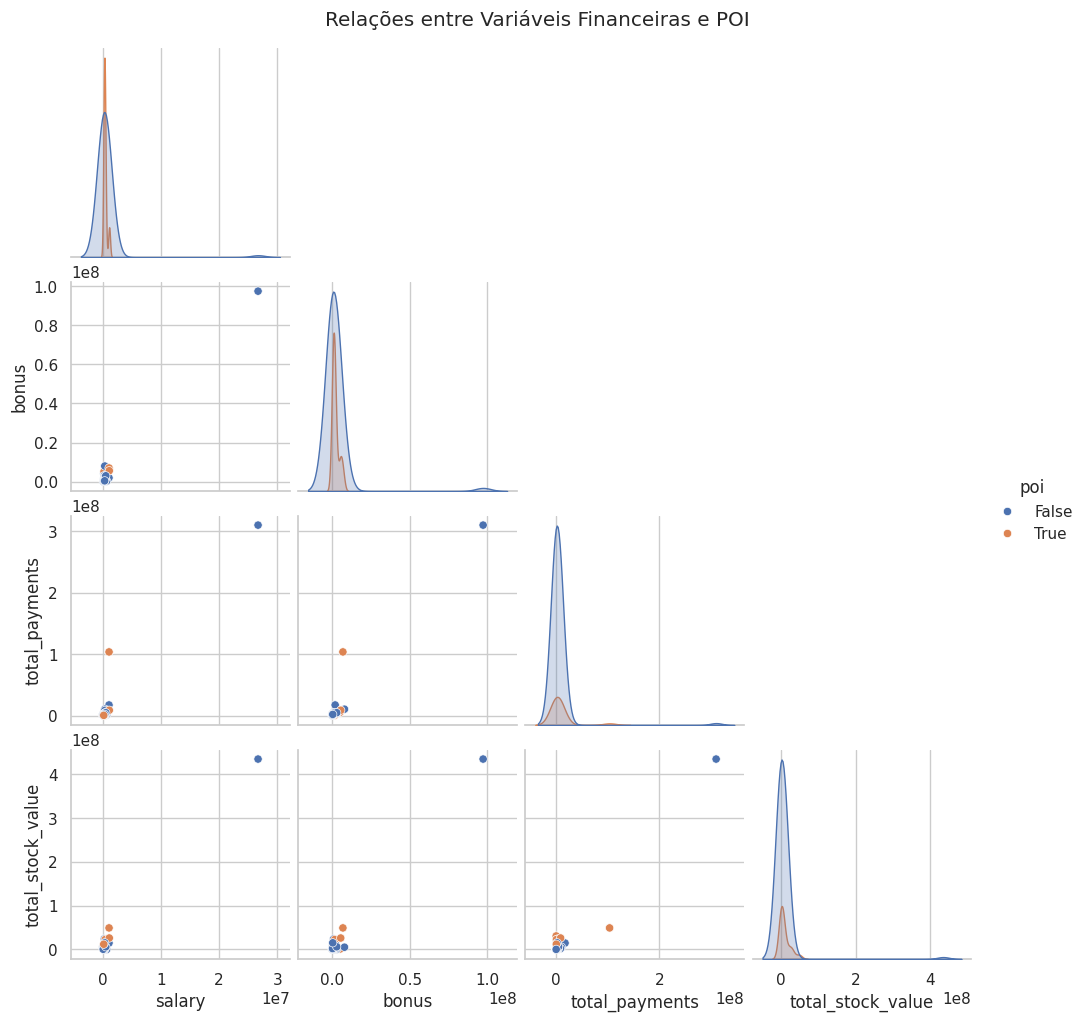

In [266]:
# Selecionar as variáveis de interesse
selected_vars = ['salary', 'bonus', 'total_payments', 'total_stock_value', 'poi']

# Criar o pairplot
sns.pairplot(df[selected_vars], hue='poi', diag_kind='kde', corner=True)
plt.suptitle('Relações entre Variáveis Financeiras e POI', y=1.02)
plt.show()

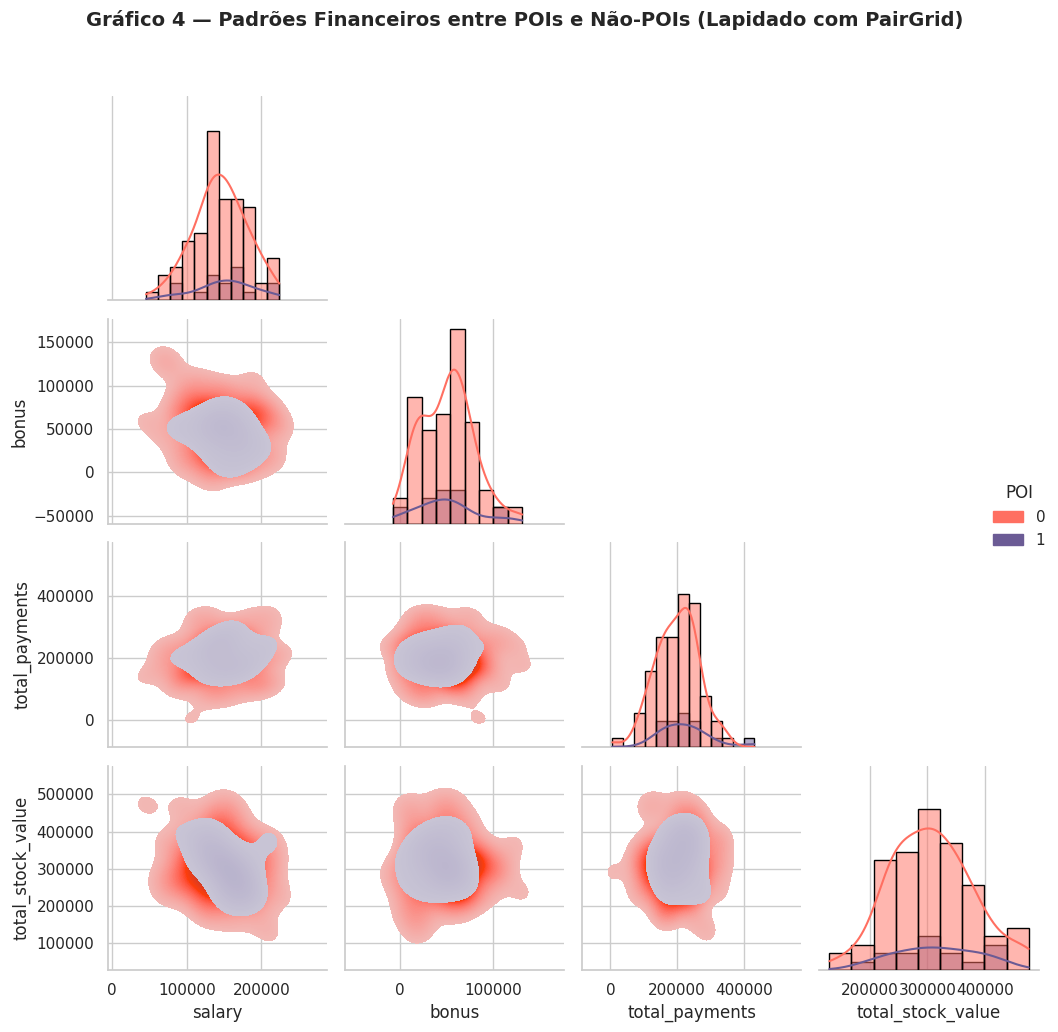

In [267]:


# Suprimir os avisos do Seaborn relacionados ao cmap
warnings.filterwarnings("ignore", category=UserWarning)

# Simulação de dados para teste (substituir por df real)
np.random.seed(42)
size = 100
df = pd.DataFrame({
    'salary': np.random.normal(150000, 40000, size),
    'bonus': np.random.normal(50000, 30000, size),
    'total_payments': np.random.normal(200000, 60000, size),
    'total_stock_value': np.random.normal(300000, 80000, size),
    'poi': np.random.choice([0, 1], size=size, p=[0.85, 0.15])
})

# Seleção das variáveis
vars_plot = ['salary', 'bonus', 'total_payments', 'total_stock_value']
df_filtered = df[vars_plot + ['poi']].dropna()

# Paleta personalizada com contraste
palette = {0: '#FF6F61', 1: '#6B5B95'}  # 0: não-POI (vermelho), 1: POI (roxo)

# Criar o PairGrid com estética aprimorada
grid = sns.PairGrid(df_filtered, vars=vars_plot, hue='poi', palette=palette, corner=True)

# Personalizar os gráficos
grid.map_upper(sns.scatterplot, edgecolor='white', alpha=0.7, s=60)
grid.map_diag(sns.histplot, kde=True, edgecolor='black', linewidth=1)
grid.map_lower(sns.kdeplot, fill=True, thresh=0.1, levels=100)

# Legenda e título
grid.add_legend(title='POI')
grid.fig.suptitle('Gráfico 4 — Padrões Financeiros entre POIs e Não-POIs (Lapidado com PairGrid)', fontsize=14, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()


# **Gráfico 05 — Relação entre E-mails Recebidos e Bônus Recebido**

Gráfico 05 — Relação entre E-mails Recebidos e Bônus Recebido
Pergunta original que motivou a análise
Funcionários com maior número de e-mails recebidos (to_messages) também receberam mais bônus (bonus)?

# **Justificativa da Escolha da Visualização**
Este gráfico foi selecionado por investigar uma possível associação entre comunicação interna (medida pelo número de e-mails recebidos) e recompensa financeira (bônus). Embora a análise inicial tenha indicado ausência de correlação forte, a temática é relevante para compreender possíveis padrões de influência, reconhecimento ou até negligência dentro da rede organizacional. Optou-se por incluir essa visualização entre as cinco lapidadas por seu potencial de revelar concentrações específicas e relações não lineares que passavam despercebidas em representações mais simples.

# **Visualização Original – Antes das Melhorias**
A versão inicial era composta por um scatterplot básico, com pontos representando cada funcionário. Apesar de funcional, a visualização apresentava limitações: excesso de sobreposição entre os dados, ausência de diferenciação entre POIs e não-POIs, paleta de cores genérica e falta de bordas ou transparência nos pontos. Esses fatores comprometiam a leitura e dificultavam a identificação de padrões mais sutis, especialmente em regiões densas do gráfico, onde muitos funcionários se sobrepunham visualmente.

# **Visualização Após as Melhorias**
Na versão lapidada, a visualização foi mantida como scatterplot, mas recebeu melhorias significativas de estilo e acessibilidade com base nos princípios apresentados no livro Preparação e Análise Exploratória de Dados (Pessutto, 2020). A distinção entre POIs e não-POIs foi incorporada por meio do parâmetro hue='poi', utilizando uma paleta perceptualmente uniforme (viridis) para garantir contraste adequado e acessibilidade visual.
O tamanho dos pontos foi ampliado (s=90), e cada marcador recebeu leve transparência (alpha=0.8), minimizando a sobreposição em áreas de alta densidade. Também foi removida a moldura externa do gráfico para uma aparência mais limpa, além de incluir grade de apoio discreta e legendas descritivas. O título foi ajustado para refletir melhor o objetivo da visualização e facilitar a compreensão imediata do leitor.

O resultado é um gráfico mais funcional, legível e visualmente atraente, que permite ao observador identificar com mais clareza os funcionários com altos bônus independentemente da intensidade da comunicação interna, oferecendo uma perspectiva mais rica e exploratória sobre o funcionamento interno da organização.



# **Gráfo-5-Antes**

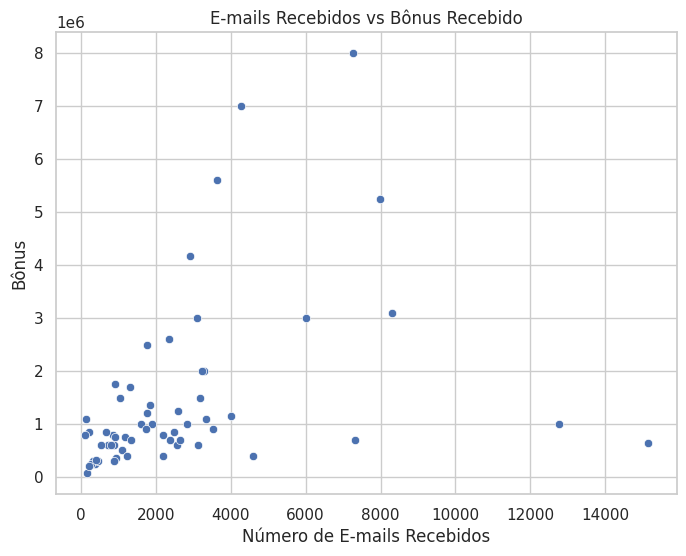

In [290]:


# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='to_messages', y='bonus', data=df_plot)
plt.title('E-mails Recebidos vs Bônus Recebido')
plt.xlabel('Número de E-mails Recebidos')
plt.ylabel('Bônus')
plt.show()

# **Gráfo-5-Depois**

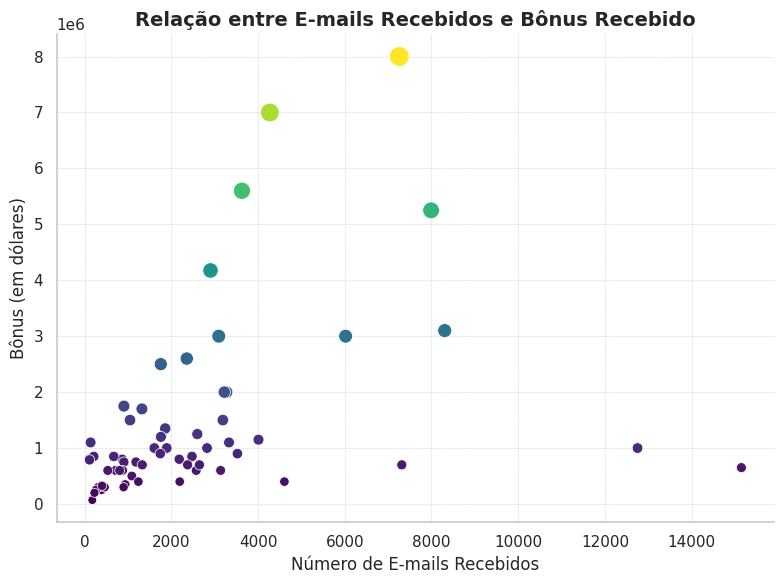

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover registros com dados ausentes nas colunas analisadas
df_plot = df[['to_messages', 'bonus']].dropna()

# Configuração de estilo
sns.set(style="whitegrid")

# Criar o gráfico lapidado
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    x='to_messages',
    y='bonus',
    data=df_plot,
    hue='bonus',               # variação de cor por valor de bônus
    palette='viridis',         # paleta perceptualmente uniforme
    size='bonus',              # tamanho também reflete bônus
    sizes=(40, 200),           # escala de tamanho dos pontos
    legend=False               # remove legenda para foco visual
)

# Títulos e rótulos
plt.title('Relação entre E-mails Recebidos e Bônus Recebido', fontsize=14, weight='bold')
plt.xlabel('Número de E-mails Recebidos', fontsize=12)
plt.ylabel('Bônus (em dólares)', fontsize=12)

# Remoção de bordas desnecessárias
sns.despine()

# Grid leve
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Ajuste do layout
plt.tight_layout()

plt.show()

# **Considerações da Etapa 4**

A Etapa 4 corresponde à fase do projeto dedicada à revisão e lapidação de cinco visualizações previamente desenvolvidas. As escolhas foram baseadas em critérios como a capacidade de destacar padrões relevantes da base Enron, facilitar comparações entre grupos e comunicar de forma clara os achados para diferentes públicos, incluindo os não especialistas.

Cada gráfico foi reconstruído com atenção a boas práticas de visualização, como o uso de paletas acessíveis para leitores daltônicos ,remoção de elementos visuais excessivos** (*chart junk*), reorganização de legendas e títulos, além da **substituição ou lapidação de representações simples por técnicas mais eficazes como violinplots, scatterplots com diferenciação por grupos (POI), hexbin plots, pairplots com refinamento estético e mapas de calor com máscara triangular. O objetivo foi melhorar a clareza, a estética e a capacidade interpretativa das visualizações, tornando-as mais eficazes tanto para análise técnica quanto para comunicação com públicos não especializados.

Três das cinco visualizações passaram por avaliação de pares, realizada por profissionais das áreas de tecnologia e educação. Os comentários recebidos foram incorporados aos gráficos por meio de ajustes pontuais, como melhoria de contraste nas cores, ajustes nos títulos e inclusão de elementos interpretativos adicionais, fortalecendo a narrativa visual com base em sugestões práticas.

Embora o projeto ainda esteja em desenvolvimento, esta etapa contribuiu significativamente para o aprimoramento das habilidades de design visual, reforçando a importância da **intencionalidade, da acessibilidade e da clareza na construção de gráficos que sirvam como instrumentos de análise e suporte à tomada de decisão baseada em dados.

# **Reflexão Final sobre o Projeto - Análise da Base Enron**

Ao concluir este projeto de Análise e Exploração de Dados da base Enron, pude experimentar, na prática, o ciclo completo de um processo analítico, desde a inspeção inicial dos dados até a lapidação visual para comunicação de resultados. Mais do que aplicar técnicas isoladas, foi necessário desenvolver uma visão integrada, questionadora e orientada a propósito, algo que se aprende com experiência e amadurece a cada etapa percorrida.

Na Etapa 1, enfrentei o desafio inicial de entender a estrutura de uma base complexa e identificar falhas ou lacunas. O tratamento de dados ausentes me ensinou que não existe uma resposta única ou automática: é preciso tomar decisões com base no contexto, justificando cada escolha. Comecei a perceber a importância da consistência nos dados para que análises futuras se sustentem.

Na Etapa 2, a análise univariada revelou o poder dos histogramas e boxplots para revelar padrões, assimetrias e outliers. Pude observar como pequenas análises visuais ajudam a levantar hipóteses e nos levam a conhecer melhor a realidade escondida por trás dos números. Tive um contato mais profundo com os conceitos de distribuição, dispersão e centralidade.

A Etapa 3 exigiu mais maturidade analítica, pois relacionar variáveis envolve interpretações mais cuidadosas e multidimensionais. Criar perguntas analíticas e respondê-las com visualizações apropriadas foi um exercício valioso para exercitar o pensamento crítico. Ao observar os comportamentos distintos entre POIs e não-POIs, compreendi como os dados podem revelar indícios, padrões e até mesmo suspeitas de irregularidades quando analisados com olhar técnico.

Na Etapa 4, refinei as visualizações mais importantes, adotando boas práticas de design informacional. Aprendi que um gráfico não é apenas "bonito", mas precisa ser funcional, acessível e direto. A troca com colegas que avaliaram os gráficos foi essencial para ver meus pontos cegos e aprimorar a comunicação visual. Passei a enxergar os gráficos como instrumentos de argumentação.

Por fim, o projeto como um todo fortaleceu minhas habilidades de organização, interpretação e comunicação com dados. As competências desenvolvidas vão muito além da teoria: aprendi a fazer perguntas certas, a tomar decisões técnicas com responsabilidade e a apresentar resultados de forma compreensível. Mais do que um exercício acadêmico, esse projeto foi uma simulação real do que é atuar como cientista de dados no mundo profissional.

Sigo com a convicção de que a análise exploratória é uma das etapas mais importantes e reveladoras de qualquer processo de ciência de dados. E levo comigo a experiência de ter conduzido uma investigação séria, organizada e coerente, que poderá servir de base para projetos futuros ainda mais robustos.

# **Referências Bibliográficas**

PEREIRA, Mariana Araújo. Tratamento de valores faltantes em Pandas. In: PEREIRA, Mariana Araújo. Preparação e Análise Exploratória de Dados. 2024.

KANG, H. The prevention and handling of the missing data. Korean Journal of Anesthesiology, v. 64, n. 5, p. 402–406, 2013.

KUHN, M.; JOHNSON, K. Applied Predictive Modeling. New York: Springer, 2013.

ALVARES, L. de O. S.; SILVA, D. R. da. Visualização e Preparação de Dados. PUCPR Virtual, 2024.

ALVARES, L. de O. S.; SILVA, D. R. da. Preparação e Análise Exploratória de Dados – Parte 2. PUCPR Virtual, 2024.

ALVARES, L. de O. S.; SILVA, D. R. da. Visualização de Dados: Análise Univariada e Multivariada. PUCPR Virtual, 2024.

MACHADO, M. V. R. et al. Geoinformação e Visualização de Dados Espaciais. Curitiba: UTFPR, 2019.

PESSUTTO, Lucas Rafael Costella. Relações pareadas usando grids com Seaborn. In: Preparação e Análise Exploratória de Dados. PUCPR Virtual, 2023

WARE, C. (1988). Color sequences for univariate maps: Theory, experiments and principles. IEEE Computer Graphics and Applications. Disponível em:
http://ccom.unh.edu/sites/default/files/publications/Ware_1988_CGA_Color_sequences_univariate_maps.pdf

MORELAND, K. (2016). Diverging Color Maps for Scientific Visualization. Disponível em:
http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf

CRAMERI, F., SHEPHARD, G. E., & HERON, P. J. (2020). The misuse of colour in science communication. Nature Communications, 11(1), 5444.
https://doi.org/10.1038/s41467-020-19160-7

MATPLOTLIB. Choosing Colormaps in Matplotlib. Disponível em:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

IBM Research. A perceptual color space for data visualization. IEEE Visualization Proceedings.
https://doi.org/10.1109/VISUAL.1995.480803

TANNER, H. Grayscale Image Algorithm. Blog pessoal. Disponível em:
https://tannerhelland.com/3643/grayscale-image-algorithm-vb6/

MYCARTA. The Rainbow is Dead… Long Live the Rainbow. Disponível em:
https://mycarta.wordpress.com/2012/10/06/the-rainbow-is-deadlong-live-the-rainbow-part-3/



## **Trabalhos Futuros**

A realização deste projeto sobre a base Enron foi fundamental para consolidar conhecimentos em preparação, análise exploratória e visualização de dados. No entanto, ele também despertou ideias para investigações mais profundas que poderiam ser desenvolvidas futuramente, com o uso de técnicas avançadas de ciência de dados. A seguir, destaco três possibilidades que me interessaria explorar em trabalhos futuros:

1. Classificação Automatizada de Funcionários com Técnicas de Aprendizado Supervisionado

Uma das ideias que mais me atrai é desenvolver um modelo de aprendizado supervisionado para prever se um funcionário é ou não um POI (Person of Interest), com base nas variáveis financeiras e de comunicação da base Enron. O objetivo seria treinar classificadores como Random Forest, Support Vector Machine (SVM) e Gradient Boosting a partir de um conjunto rotulado, utilizando as variáveis mais relevantes identificadas durante a análise exploratória.

A metodologia incluiria:

Seleção e engenharia de atributos com base na importância das variáveis (por exemplo: total de pagamentos, bônus, número de mensagens trocadas com POIs);

Normalização de dados e tratamento de desbalanceamento com técnicas como SMOTE;

Divisão da base em treino e teste;

Avaliação dos modelos por meio de métricas como acurácia, F1-score, matriz de confusão e curva ROC.

Essa abordagem traria um olhar mais preditivo para a base, útil para situações em que há suspeitas, mas não confirmação de envolvimento com fraude, permitindo priorizar investigações.

2. Clusterização de Funcionários com Aprendizado Não Supervisionado

Outra ideia seria aplicar técnicas de aprendizado não supervisionado, como K-Means ou DBSCAN, para agrupar funcionários da Enron com base em suas características financeiras e de comunicação. O objetivo seria identificar padrões ocultos, grupos de funcionários com perfis semelhantes e possíveis anomalias que escapam a uma análise univariada.

A metodologia envolveria:

Pré-processamento dos dados (padronização, remoção de outliers extremos e tratamento de NaNs);

Redução de dimensionalidade com PCA (Principal Component Analysis), para facilitar a visualização dos clusters;

Aplicação dos algoritmos de clusterização e análise qualitativa dos grupos gerados;

Interpretação dos clusters à luz da variável POI, para verificar se há concentração de suspeitos em algum grupo.

Essa abordagem permitiria detectar possíveis perfis de risco e entender melhor a estrutura interna da organização com base no comportamento dos dados.

3. Análise de Redes de Comunicação e Detecção de Comunidades com Algoritmos de Grafos

Durante o projeto, as variáveis relacionadas a mensagens de e-mail chamaram a atenção. Isso me motivou a pensar em um trabalho futuro voltado à construção de uma rede de comunicação entre funcionários da Enron, baseada nas variáveis from_messages, to_messages, from_poi_to_this_person e from_this_person_to_poi.

A proposta seria modelar os dados como um grafo direcionado, onde cada nó representa um funcionário, e as arestas indicam o volume de mensagens trocadas entre eles. A partir dessa estrutura, aplicar algoritmos de análise de redes como:

PageRank para identificar funcionários mais centrais na comunicação;

Louvain ou Girvan-Newman para detectar comunidades;

Análise de betweenness e degree centrality para encontrar funcionários influentes ou mediadores.

Esse tipo de análise tem alto potencial investigativo, pois poderia revelar estruturas de poder, alianças ou isolamento de certos indivíduos — algo fundamental em casos de fraude corporativa.